In [1]:
# -*- coding: utf-8 -*-
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#    http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or
# implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

# Clustering
Clustering is a data mining technique that groups unlabeled data based on their similarities or differences. Clustering algorithms process raw, unclassified data objects into groups represented by structures or patterns in the information. Clustering algorithms can be categorized into a few types, including exclusive, overlapping, hierarchical, and probabilistic.

**Datasets:**
- **Online Shoppers Intention** https://www.kaggle.com/datasets/henrysue/online-shoppers-intention
- Sakar, C.O., Polat, S.O., Katircioglu, M. and Kastro, Y., 2019. Real-time prediction of online shoppers’ purchasing intention using multilayer perceptron and LSTM recurrent neural networks. Neural Computing and Applications, 31(10), pp.6893-6908, 2019. https://link.springer.com/article/10.1007/s00521-018-3523-0
- **Credit Card Dataset for Clustering** https://www.kaggle.com/datasets/arjunbhasin2013/ccdata for Probabilistic Clustering

**Sources:**
- https://www.techtarget.com/searchenterpriseai/definition/unsupervised-learning
- https://www.datacamp.com/blog/introduction-to-unsupervised-learning
- https://www.kaggle.com/code/vipulgandhi/gaussian-mixture-models-clustering-explained/notebook
- [IBM Explainers](https://www.ibm.com/topics/unsupervisedlearning#:~:text=Unsupervised%20learning%2C%20also%20known%20as,the%20need%20for%20human%20intervention)
- https://www.kaggle.com/code/thuggy/predicting-purchasing-intention
- https://builtin.com/data-science/elbow-method
- https://www.kdnuggets.com/2023/04/exploring-unsupervised-learning-metrics.html


In [2]:
#! pip install scikit-fuzzy
#! pip install sammon-mapping

In [3]:
from sklearn.cluster import KMeans
import skfuzzy as fuzz
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from sklearn.metrics import silhouette_score
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import normalize
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sammon import sammon
from sklearn.manifold import trustworthiness
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## **Exploratory Data Analysis**

In [4]:
# Load the data
df = pd.read_csv('data/online_shoppers_intention.csv', encoding="utf-8")
df.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [5]:
# The first few rows of the dataset are displayed using df.head(), providing an initial glimpse into the data's structure and the types of values it contains.
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
print(u'- Number of rows: {}'.format(df.shape[0]))
print(u'- Number of columns: {}'.format(df.shape[1]))
print(u'- Name of independent variables: {}'.format(list(df.columns[:-1])))
print(u'- Name of target: {}'.format(list(df.columns[-1:])))
print(u'- Dataset shape:{}'.format(df.shape))

- Number of rows: 12330
- Number of columns: 18
- Name of independent variables: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
- Name of target: ['Revenue']
- Dataset shape:(12330, 18)


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [8]:
df.groupby('Month', observed=False).agg('count')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Month,,,,,,,,,,,,,,,,,
Aug,433,433,433,433,433,433,433,433,433,433,433,433,433,433,433,433,433
Dec,1727,1727,1727,1727,1727,1727,1727,1727,1727,1727,1727,1727,1727,1727,1727,1727,1727
Feb,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184
Jul,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432
June,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288
Mar,1907,1907,1907,1907,1907,1907,1907,1907,1907,1907,1907,1907,1907,1907,1907,1907,1907
May,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364
Nov,2998,2998,2998,2998,2998,2998,2998,2998,2998,2998,2998,2998,2998,2998,2998,2998,2998
Oct,549,549,549,549,549,549,549,549,549,549,549,549,549,549,549,549,549


Upon examining the 'Month' column, it was observed that most months are abbreviated (e.g., JUL, AUG, DEC), but one entry uses 'June' instead of 'Jun'. To maintain consistency, this will be corrected. Additionally, there is an absence of data for January and April; these months will be excluded from the analysis for consistency.

Checking for Null Data

In [9]:
df.notnull().all()

Administrative             True
Administrative_Duration    True
Informational              True
Informational_Duration     True
ProductRelated             True
ProductRelated_Duration    True
BounceRates                True
ExitRates                  True
PageValues                 True
SpecialDay                 True
Month                      True
OperatingSystems           True
Browser                    True
Region                     True
TrafficType                True
VisitorType                True
Weekend                    True
Revenue                    True
dtype: bool

In [10]:
# Remove duplicates
df1 = df.drop_duplicates()
# dropping any rows with missing values (NaN) from the DataFrame
df1 = df1.dropna() 

In [11]:
# Numerical & Categorical columns
num_cols = [x for x in df1.select_dtypes(include=np.number)]
cat_cols = [x for x in df1.select_dtypes(exclude=np.number)]
print("There are", len(num_cols), "numerical columns and", len(cat_cols), "categorical columns in the dataset\n")
print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)

There are 14 numerical columns and 4 categorical columns in the dataset

Numerical columns: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']
Categorical columns: ['Month', 'VisitorType', 'Weekend', 'Revenue']


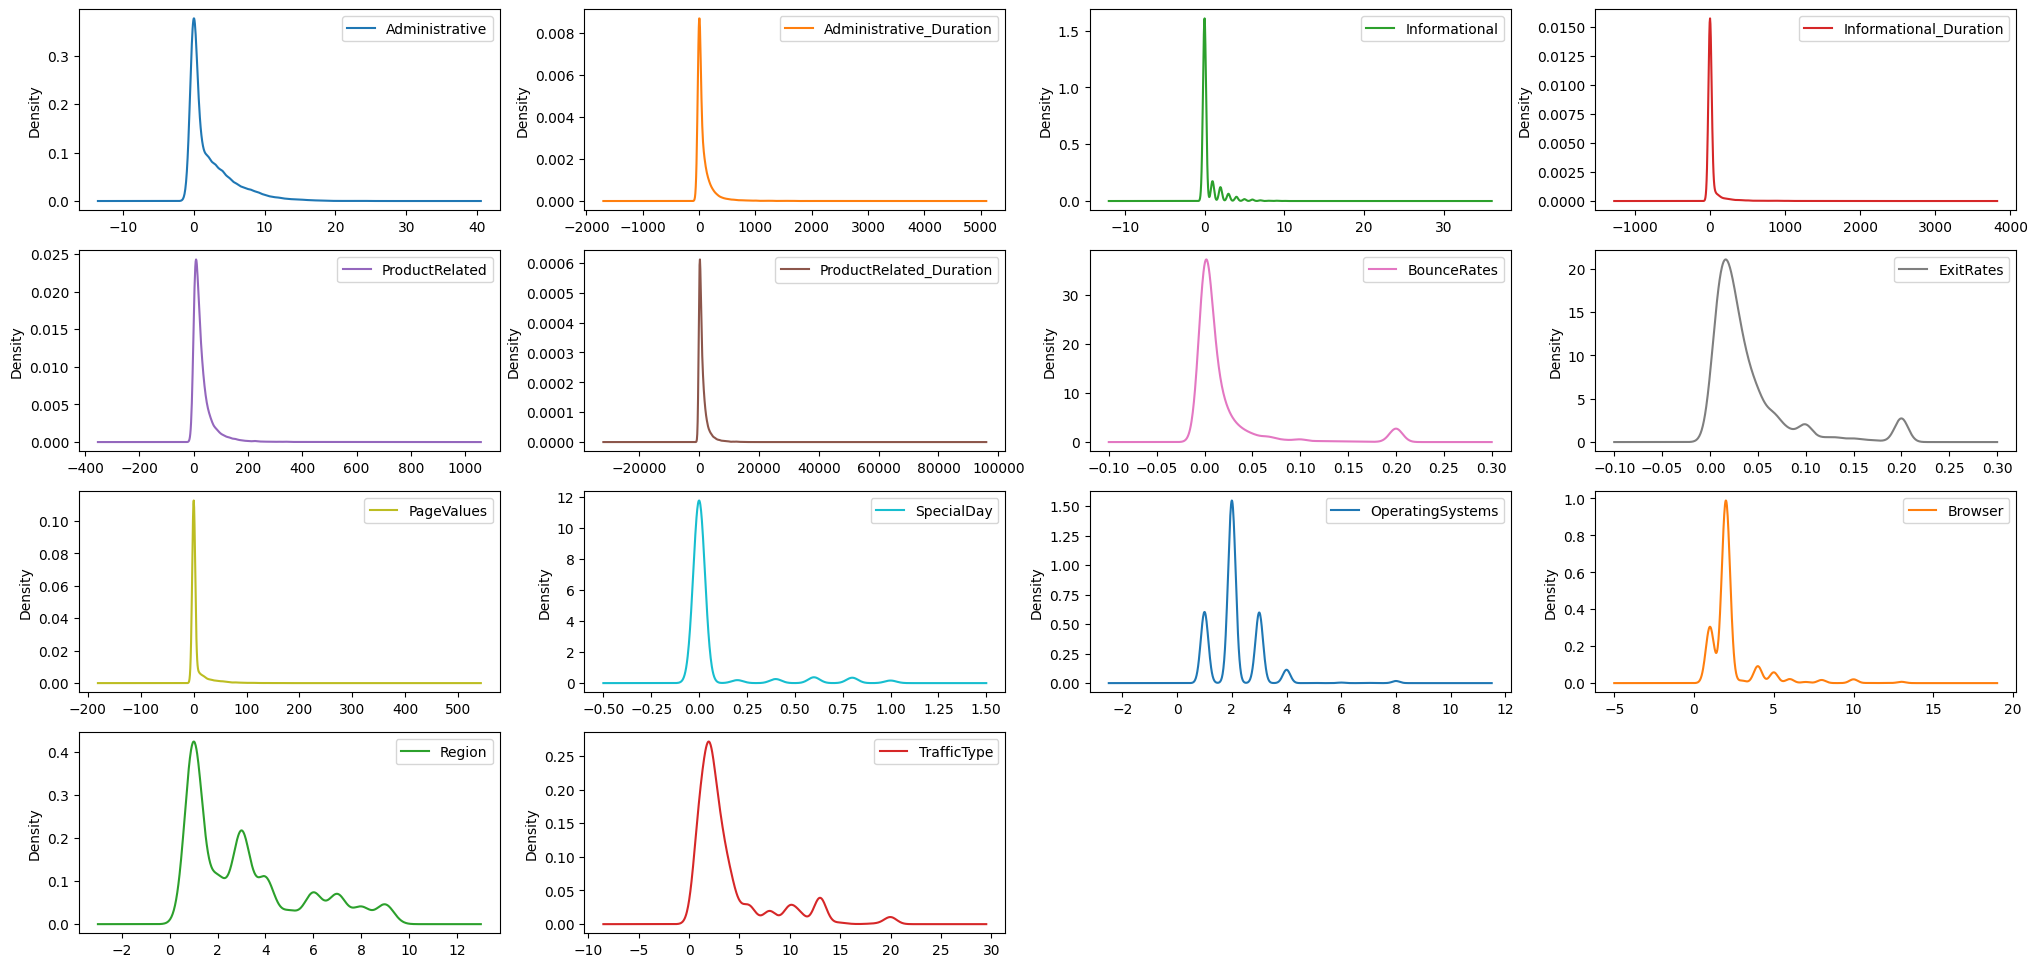

In [12]:
 # Numerical Columns Plot & Box Plot 
df1[num_cols].plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(25, 12));

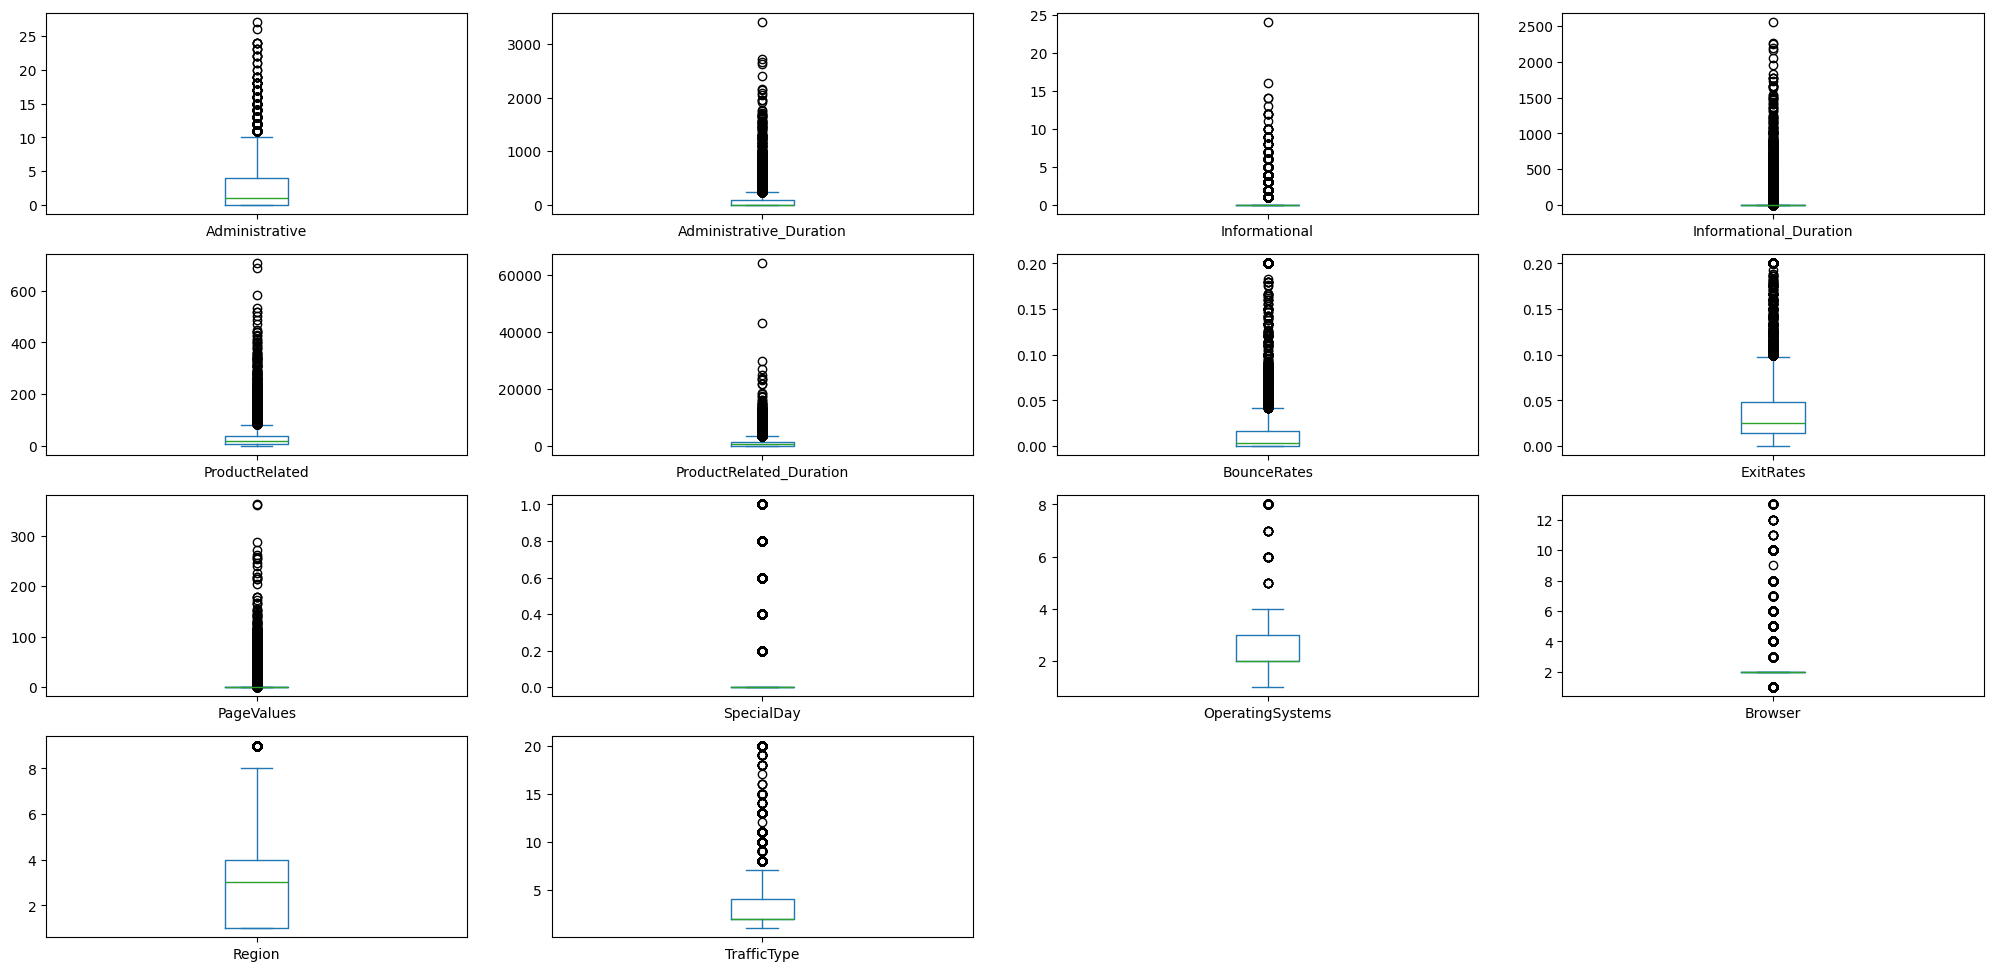

In [13]:
df1[num_cols].plot(kind='box', subplots=True, layout=(4,4), sharex=False, figsize=(25, 12));

In [14]:
def show_count_plot(df, col, rotation=0, figsize=(12, 6), hue=None, color='orange'):
    plt.figure(figsize=figsize)
    ax = sns.countplot(x=df[col],
                       order=df[col].value_counts(ascending=False).head(10).index,
                       hue=hue, color=color)
    ax.set_ylabel('Count', size=10)
    ax.set_xlabel(col, size=10)
    plt.xticks(rotation=rotation, size=10)
    plt.yticks(size=10)
    
    # Get absolute and relative values
    abs_values = df[col].value_counts(ascending=False).head(10)
    rel_values = df[col].value_counts(ascending=False, normalize=True).head(10).values * 100
    labels = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
    
    # Set labels on bars
    ax.bar_label(container=ax.containers[0], labels=labels, size=10)

    plt.show()  # Show the plot

**Administrative and Administrative Duration**

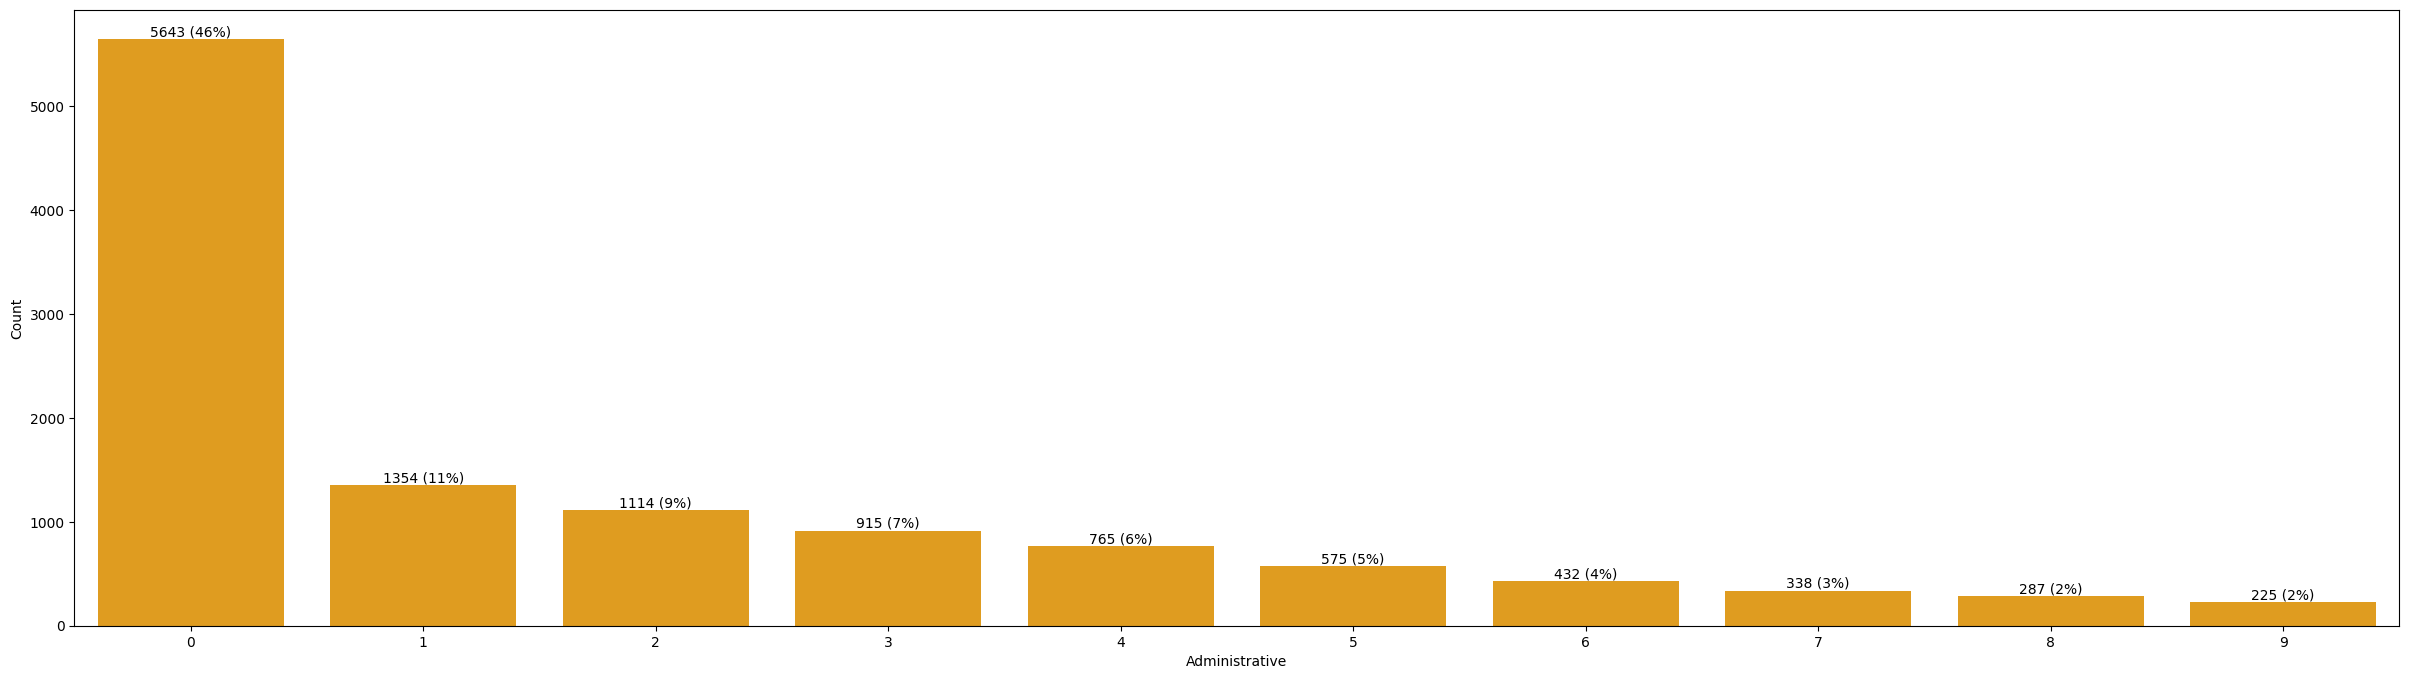

In [15]:
show_count_plot(df1,'Administrative', figsize=(30,8))

Approximately 50% of users did not visit the Administrative page.

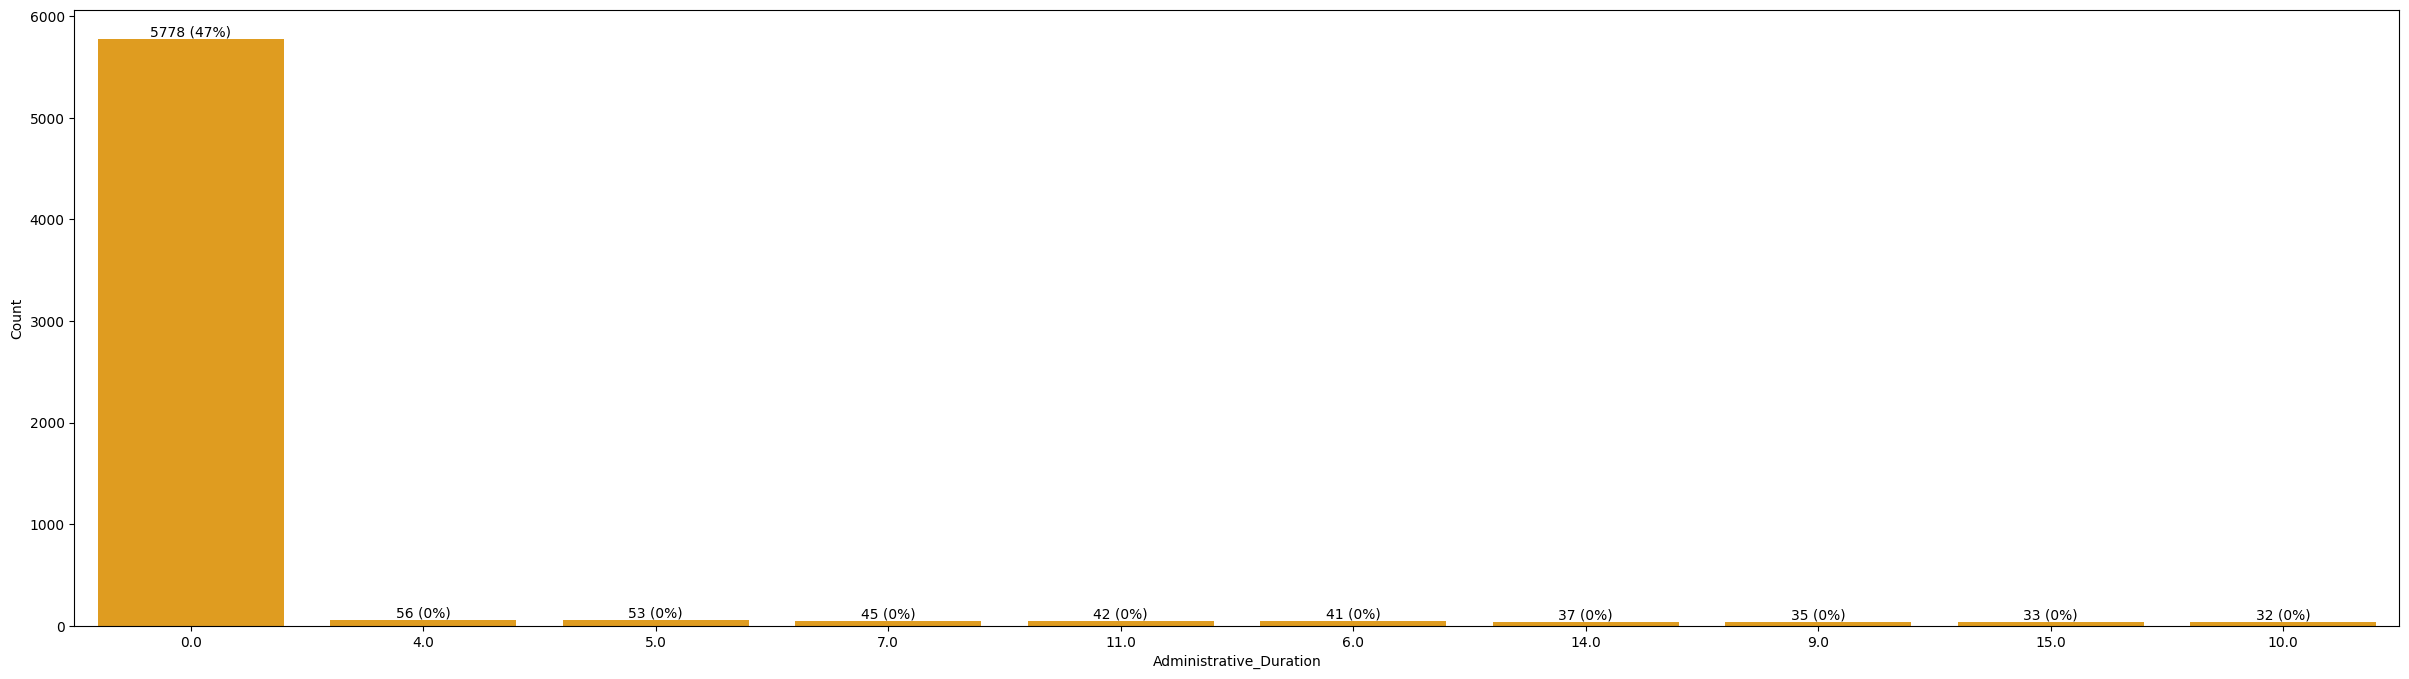

In [16]:
show_count_plot(df1,'Administrative_Duration', figsize=(30,8))

**Informational and Informational_Duration**

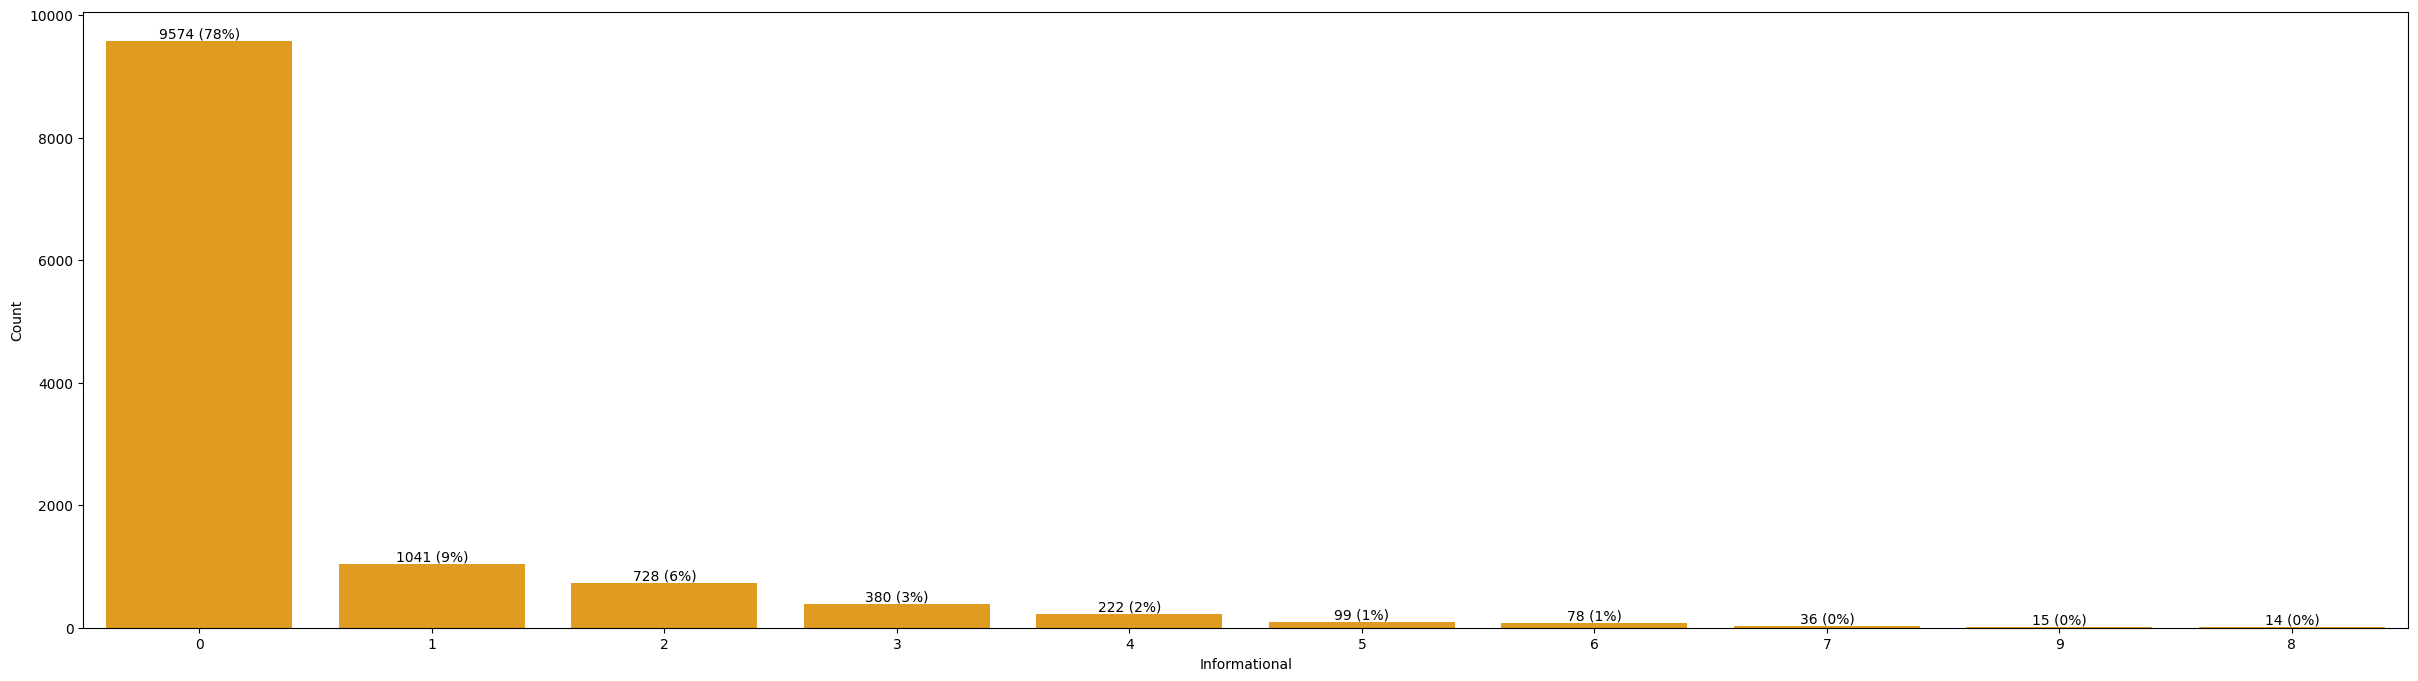

In [17]:
show_count_plot(df1,'Informational', figsize=(30,8))

Approximately 80% of users did not visit the informational page.

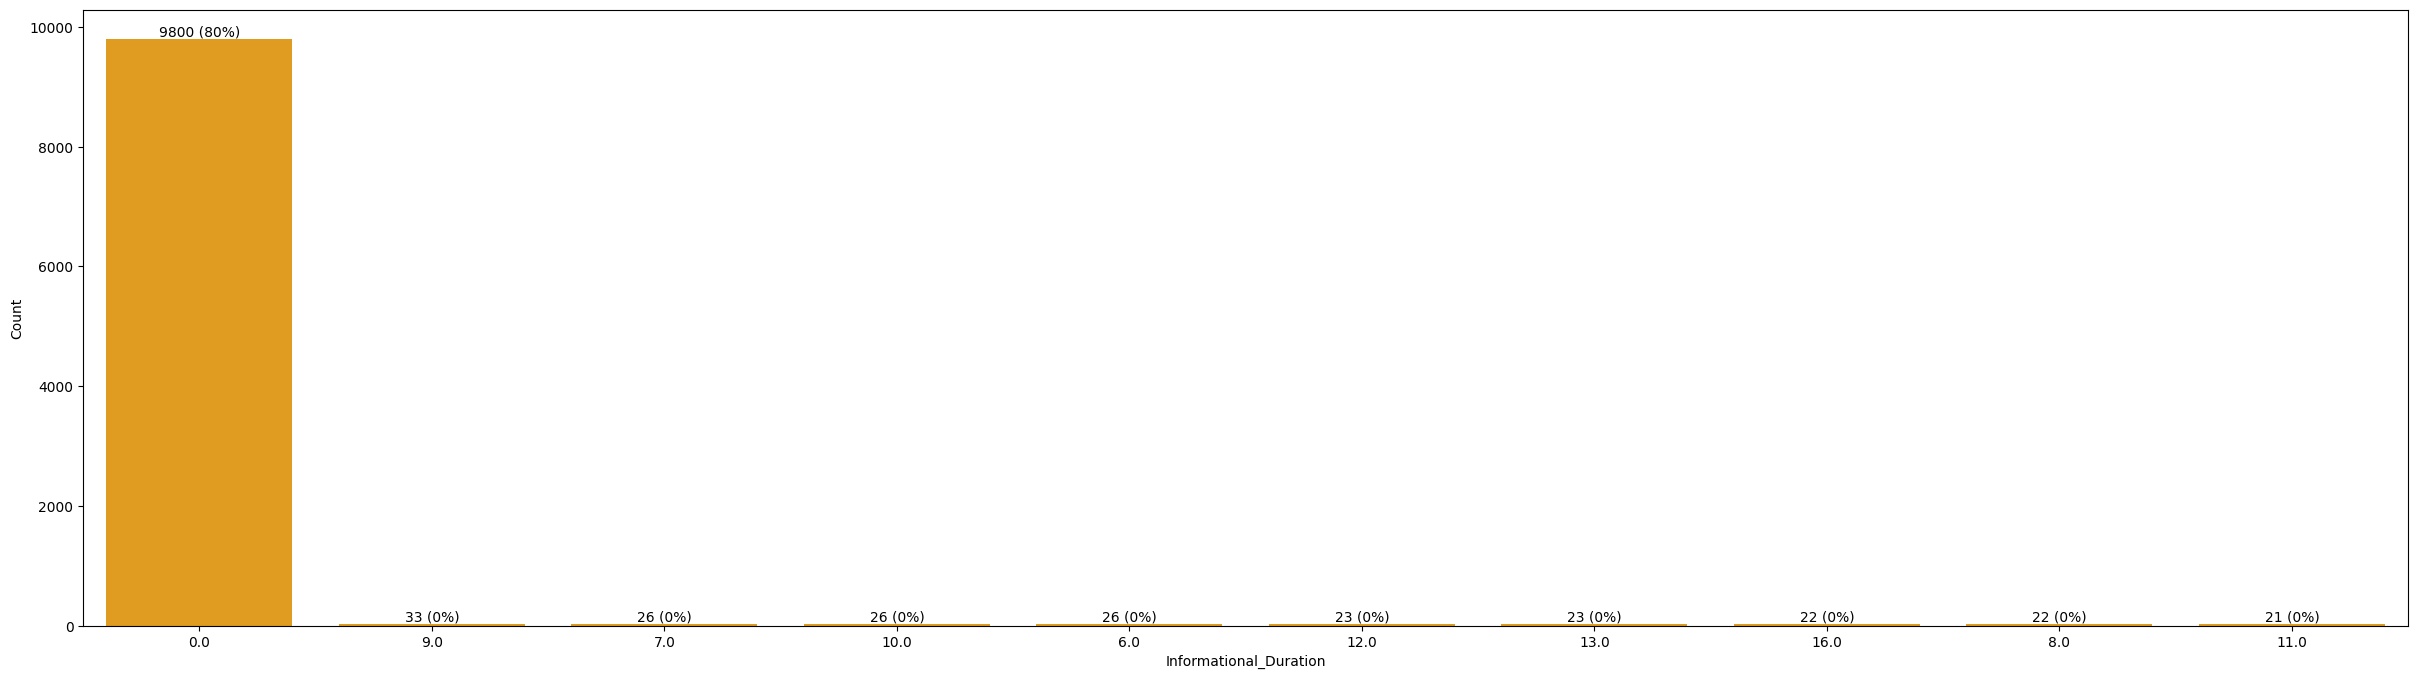

In [18]:
show_count_plot(df1,'Informational_Duration', figsize=(30,8))

**ProductRelated and ProductRelated_Duration**

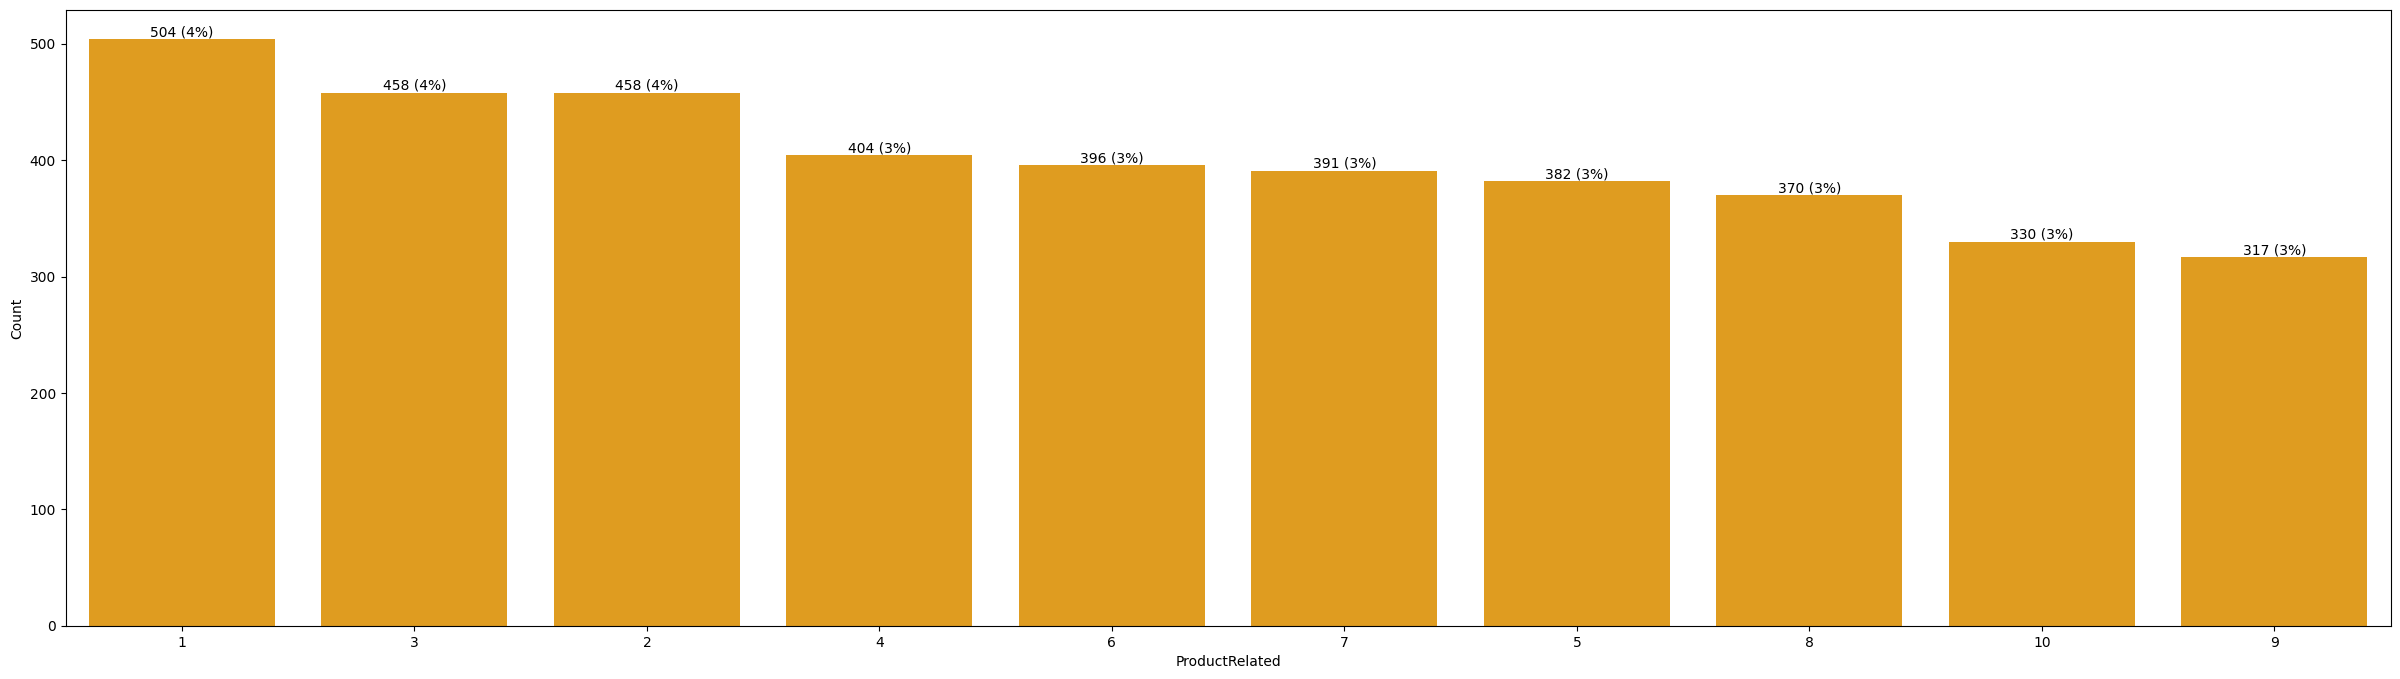

In [19]:
show_count_plot(df1,'ProductRelated', figsize=(30,8))

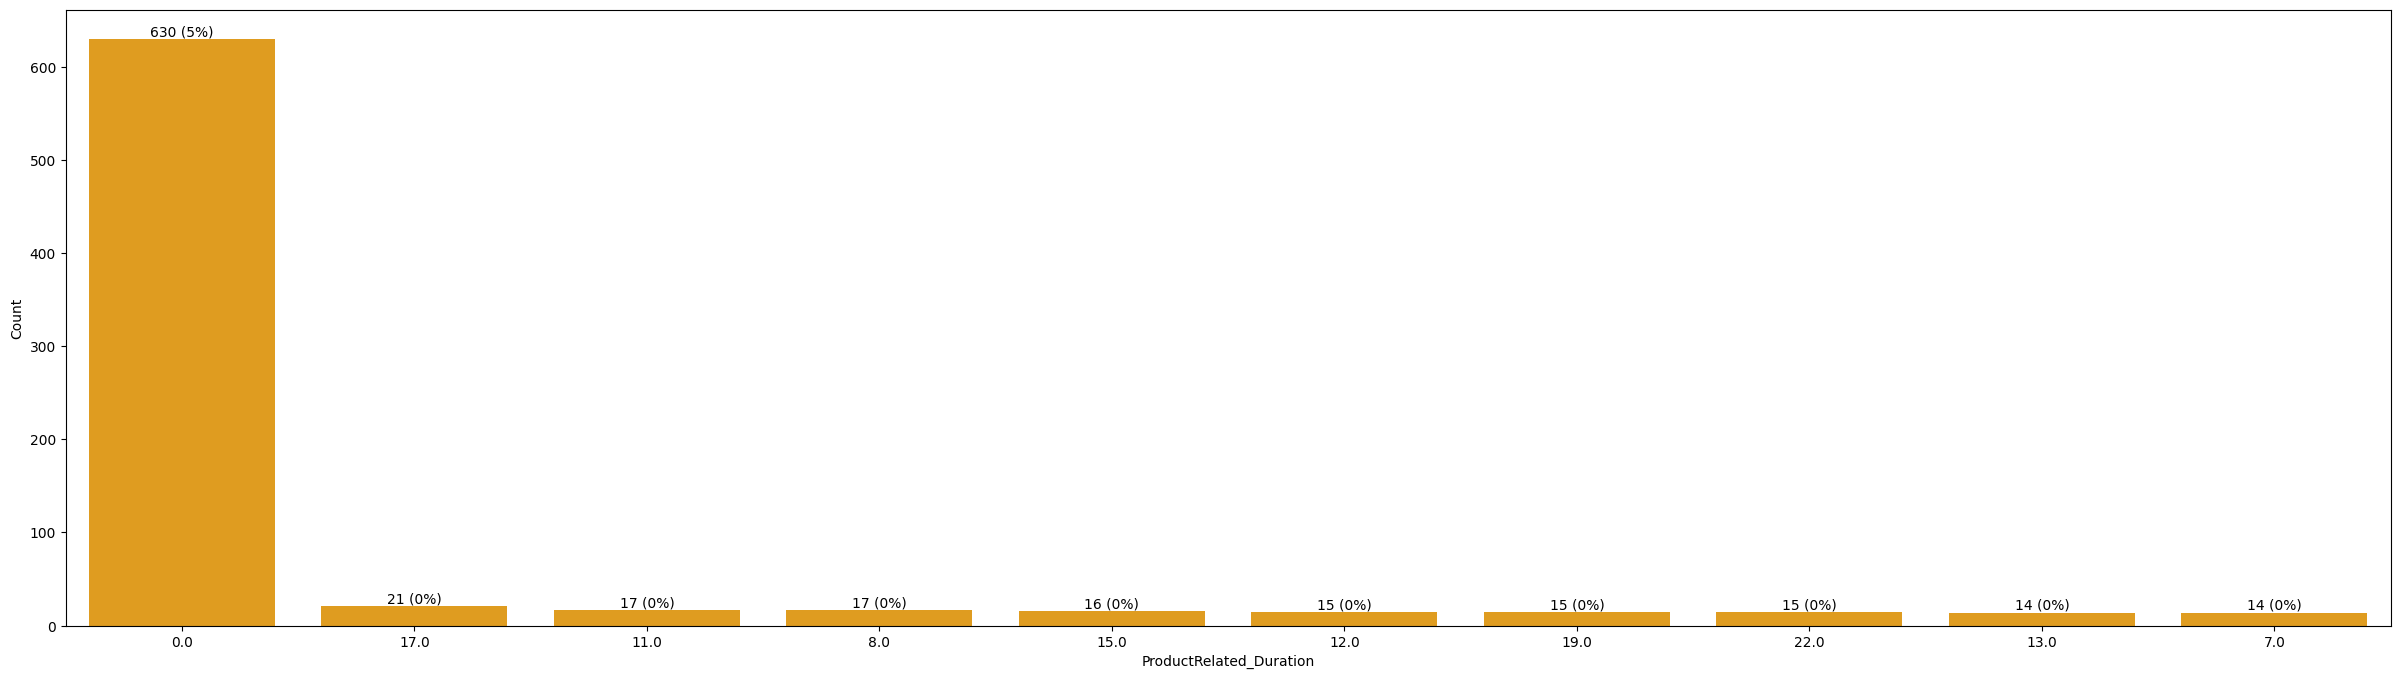

In [20]:
show_count_plot(df1,'ProductRelated_Duration', figsize=(30,8))

ProductRelated pages were visited relatively evenly.

**SpecialDay**

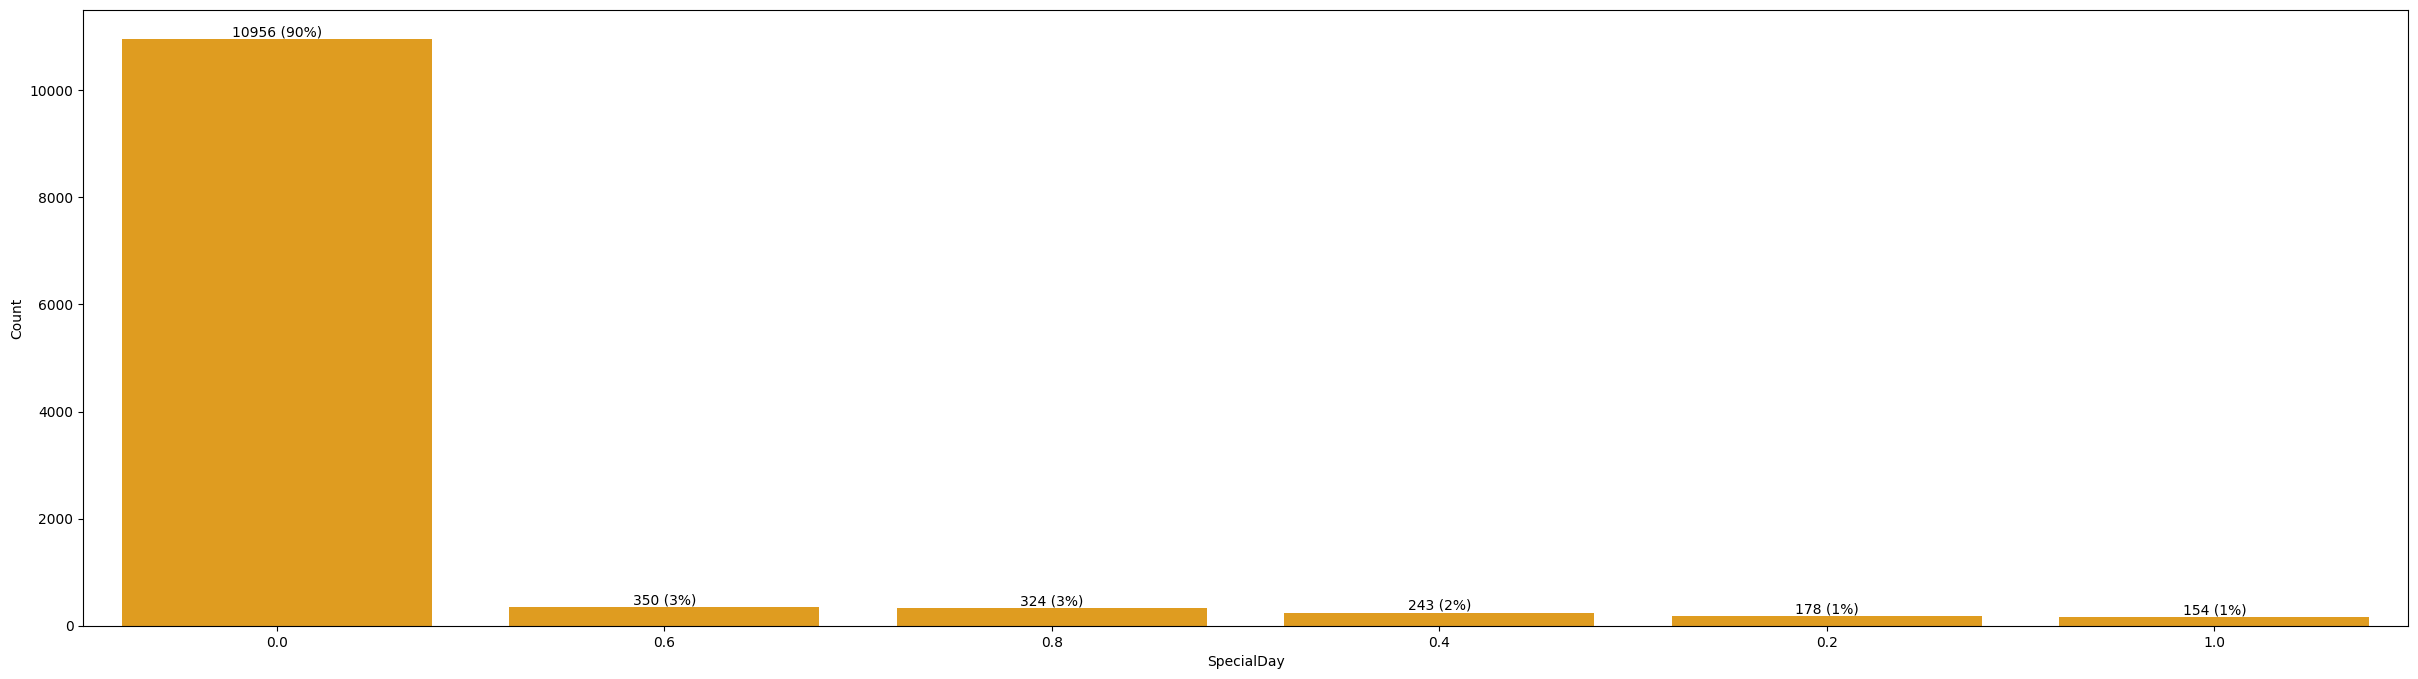

In [21]:
show_count_plot(df1,'SpecialDay', figsize=(30,8))

About 90% of visitors are not affected by Special Days.

**OperatingSystems**

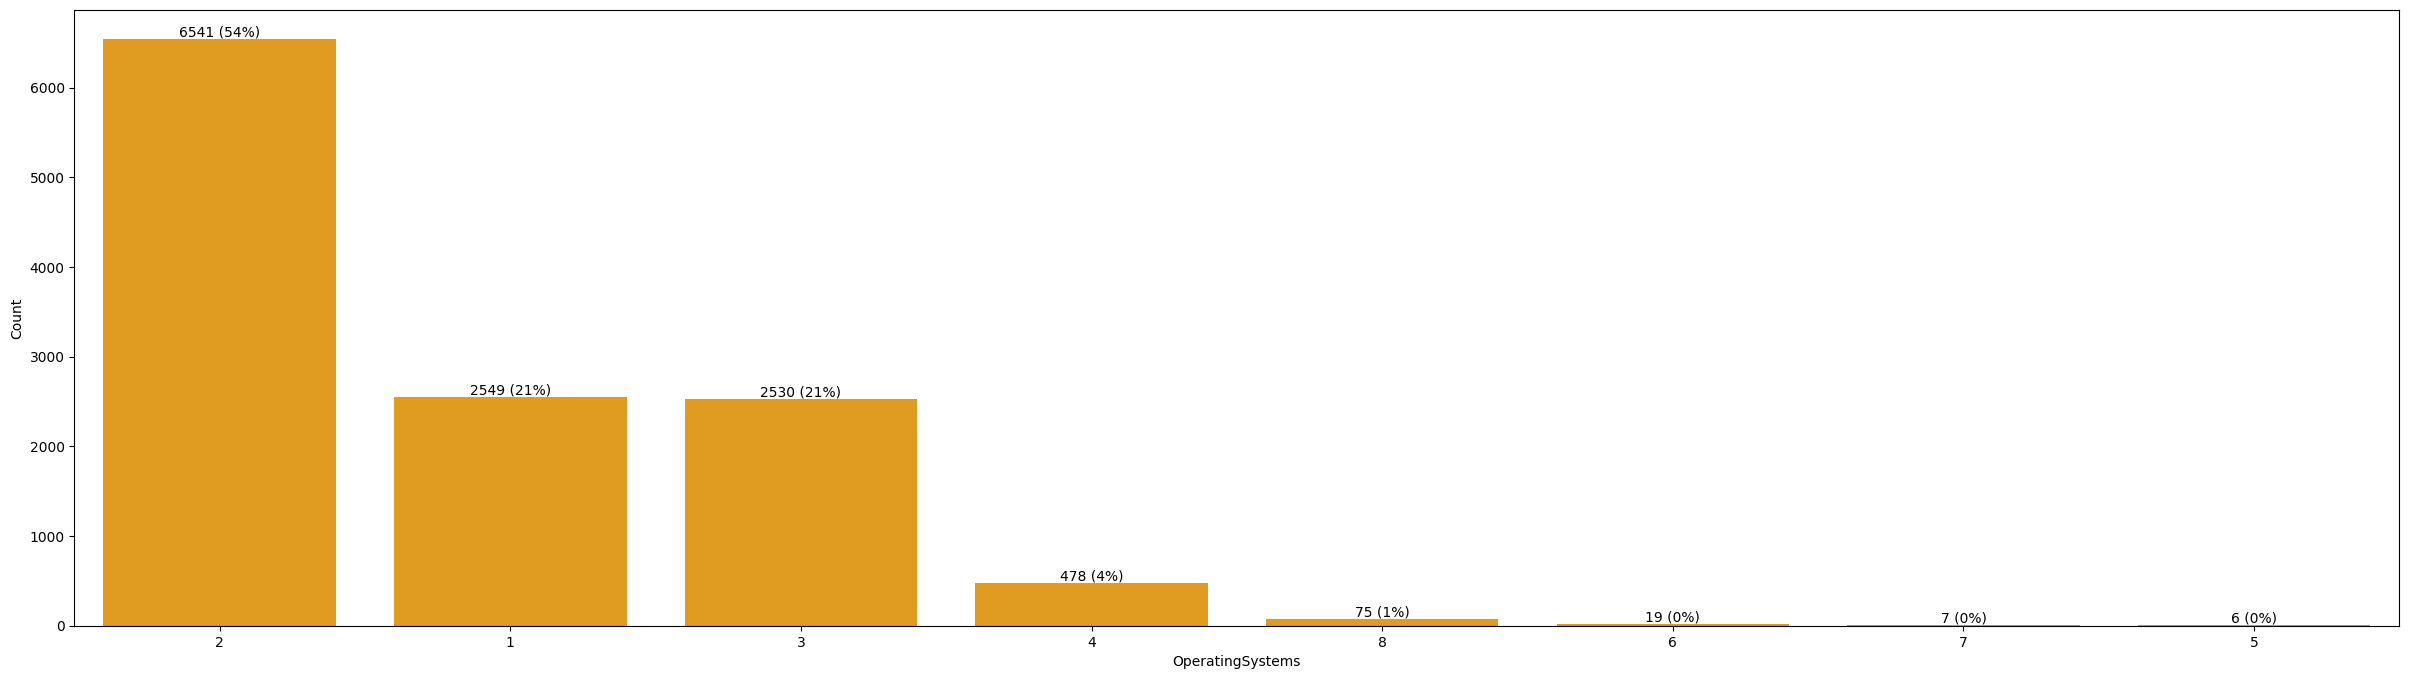

In [22]:
show_count_plot(df1,'OperatingSystems', figsize=(30,8))

The top 3 operating systems are: 2, 1, and 3. Over 50% of our visitors use OS 2.

**Browser**

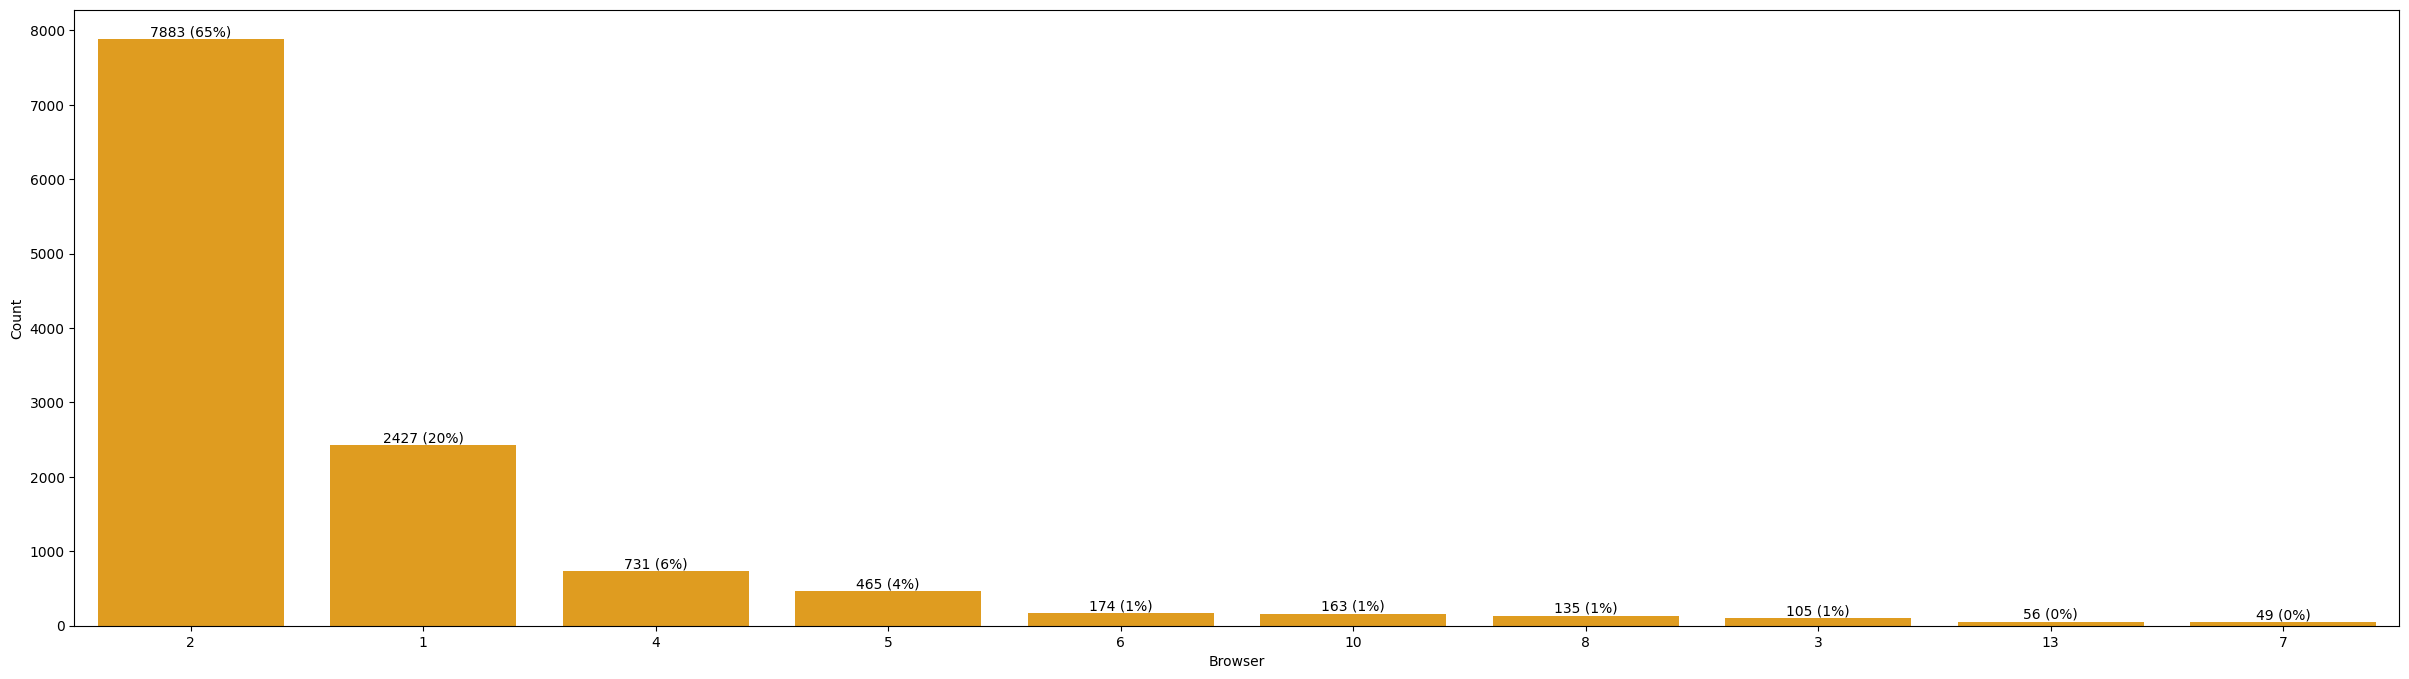

In [23]:
show_count_plot(df1,'Browser', figsize=(30,8))

The top 3 browsers are: 2, 1, and 4. You can see that 65% of visitors come from browser 2, and over 85% come from browsers 2 and 1.

**Month**

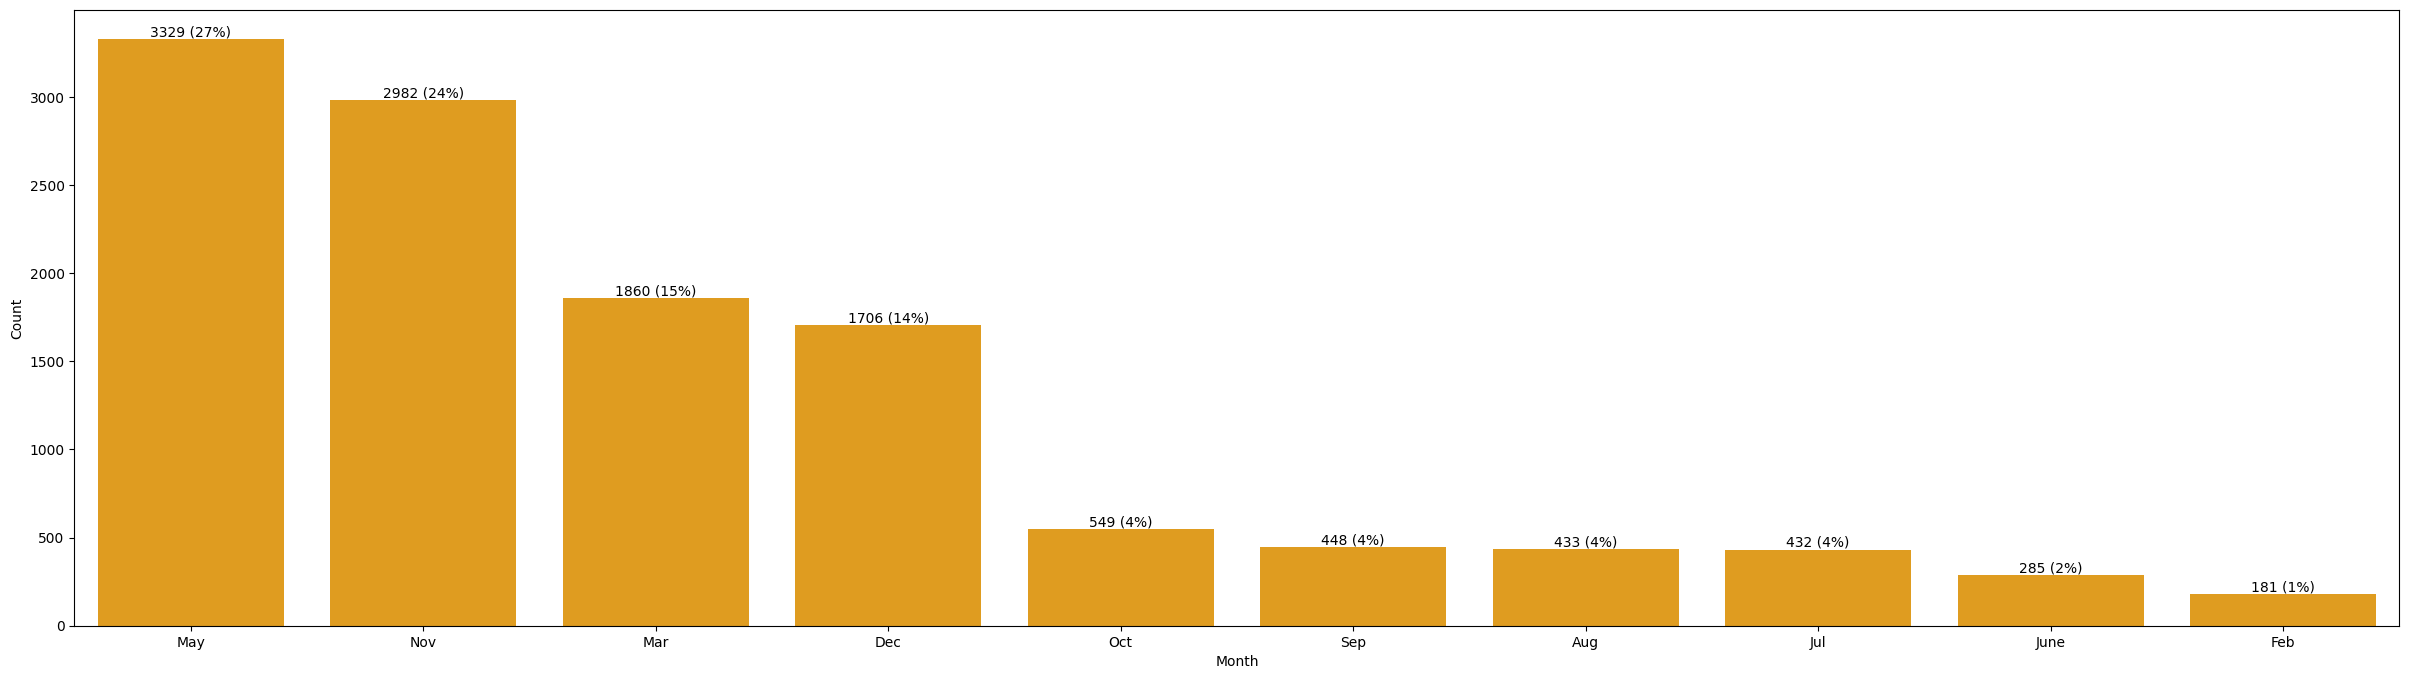

In [24]:
show_count_plot(df1, 'Month',figsize=(30,8))

The most visited months are May, November and March. However, data for January and April was missing. 

**Visitor Type**

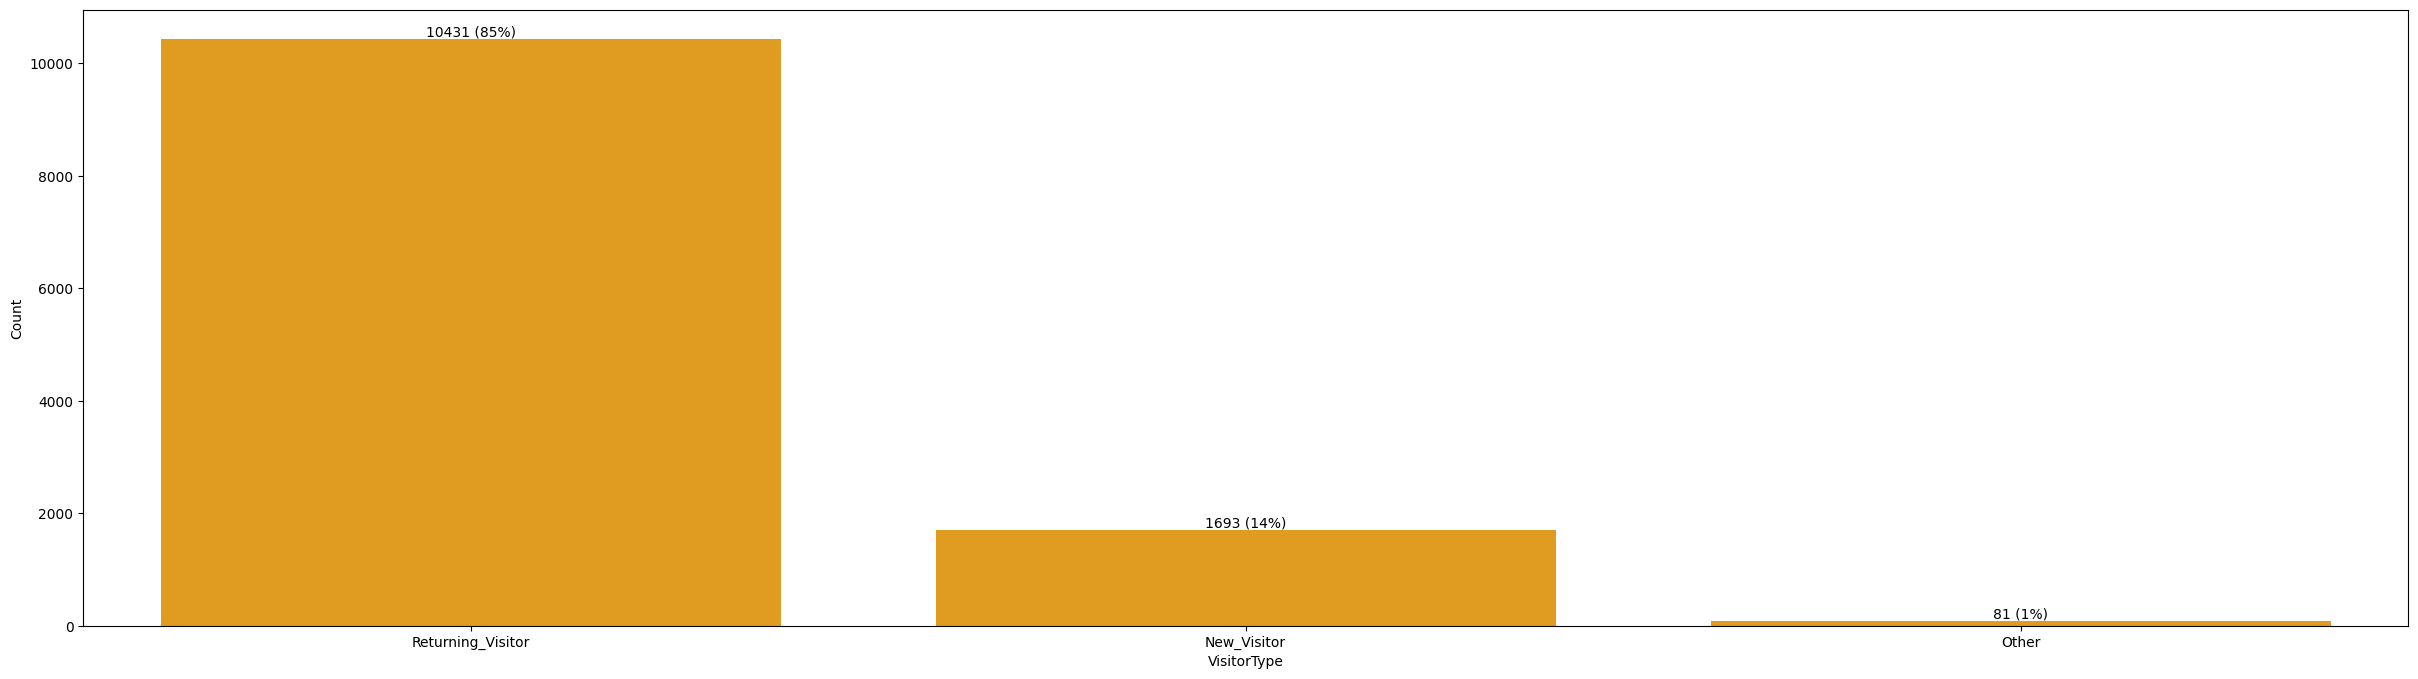

In [25]:
show_count_plot(df1, 'VisitorType',figsize=(30,8))

The majority of visitors return to the website, with 86% returning customers vs. 14% new customers. 

**Weekend**

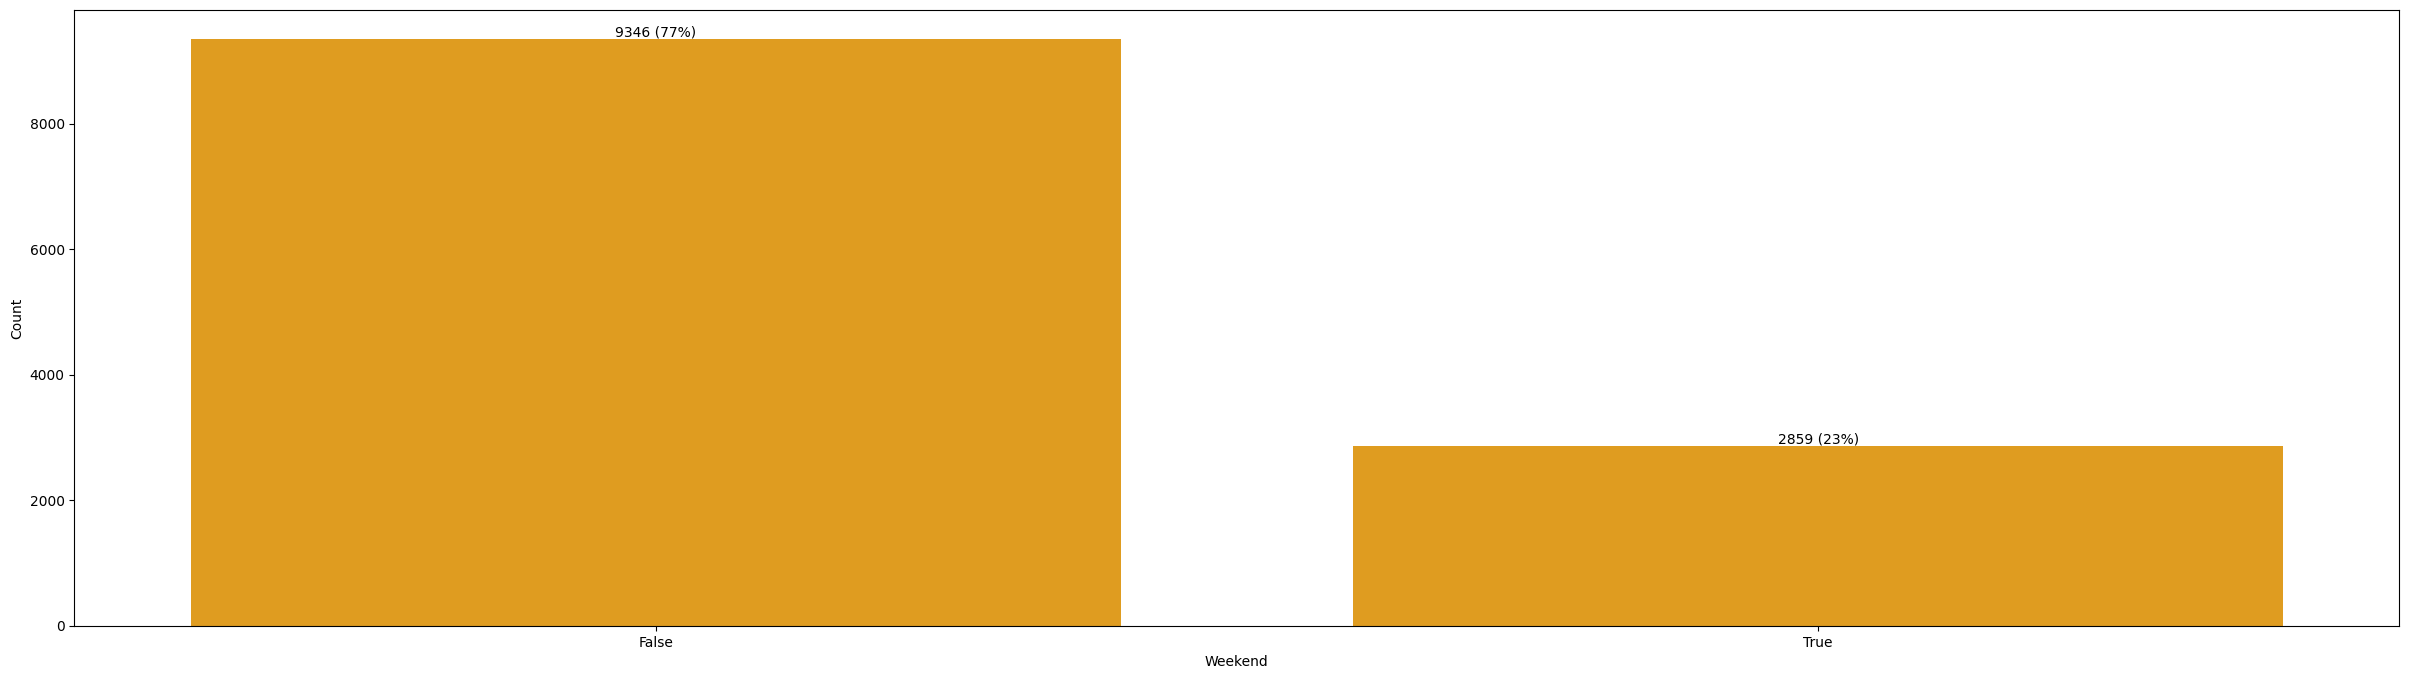

In [26]:
show_count_plot(df1, 'Weekend',figsize=(30,8))

77% of visitors do not visit on weekends, while 23% visit on weekends. Since there are 5 days on weekdays and 2 days on weekends

**Revenue**

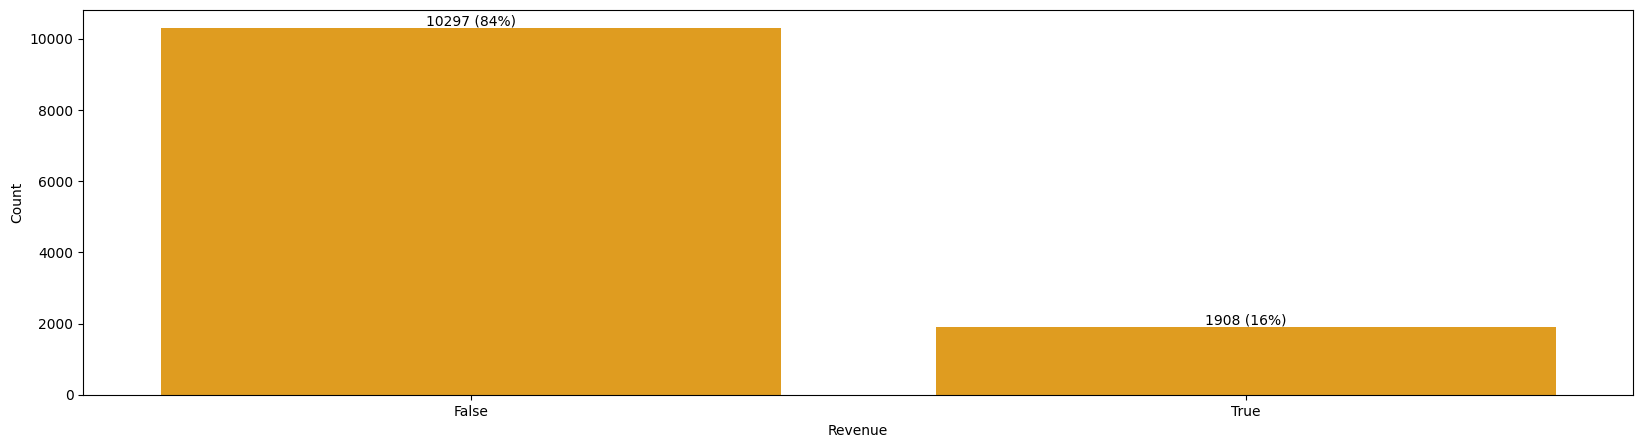

In [27]:
show_count_plot(df1, 'Revenue',figsize=(20,5))

Encoding categorical variables

In [28]:
# Define the mapping of months to numbers
month_mapping = {'Feb': 2, 'Mar': 3, 'May': 5, 'Oct': 10, 'June': 6, 'Jul': 7, 'Aug': 8, 'Nov': 11, 'Sep': 9, 'Dec': 12}

# Use .loc to set the 'Month' column values in the original DataFrame
df1.loc[:, 'Month'] = df1['Month'].map(month_mapping)

# Verify the change
print(df1.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0     2                 1   
1         0.00       0.10         0.0         0.0     2   

In [29]:
# visitor_type column
visitor_encoded = pd.get_dummies(df1['VisitorType'], prefix='VisitorType', drop_first = True)
df1 = pd.concat([df1, visitor_encoded], axis=1).drop(['VisitorType'], axis=1)

In [30]:
# Convert variable to Int type
df1['Revenue'] = df1['Revenue'].astype(int)
df1['Weekend'] = df1['Weekend'].astype(int)

<Axes: >

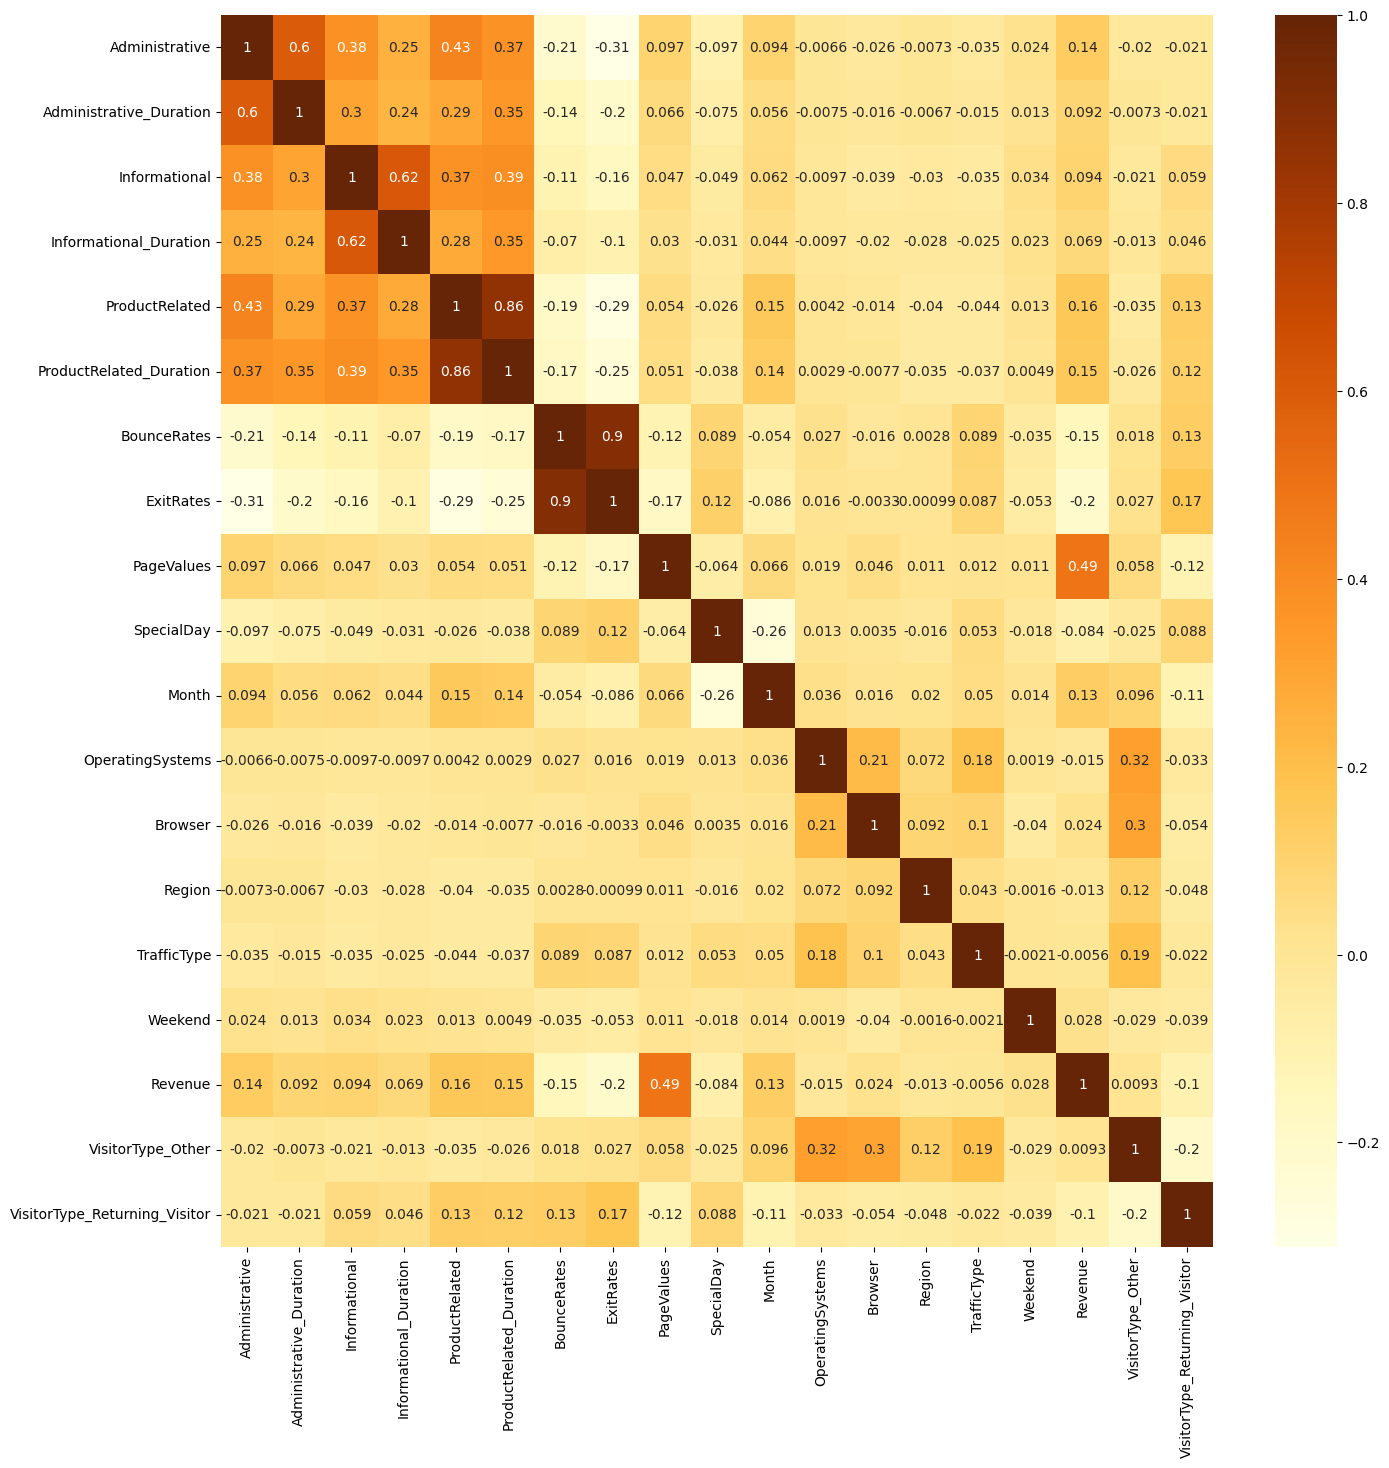

In [31]:
# Check correlation coefficient
df_Corr = df1.corr()
fig, ax = plt.subplots(figsize=(16,16))  
sns.heatmap(df_Corr, xticklabels=df_Corr.columns, yticklabels=df_Corr.columns, annot=True, cmap = 'YlOrBr')

Remove unnecessary columns

In the case of the Month column, it was removed because it was incomplete data missing January and April. As a result of heatmap visualization, it was decided to remove independent variables whose correlation coefficient with the dependent variable was less than 0.05. (based on absolute value) So let's remove the Month, Browser, OperatingSystems, Region, TrafficType, Weekend, and VisitorType_Other columns.

In [32]:
# Dropping specified columns
df2 = df1.drop(['Month','Browser','OperatingSystems','Region','TrafficType','Weekend','VisitorType_Other'], axis=1)

In [33]:
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Revenue,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,0,True
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,0,True
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,0,True
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,0,True
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,0,True


## Clustering Algorithm Metrics
### **Elbow method**

The elbow method involves finding the optimal k via a graphical representation. It works by finding the within-cluster sum of square (WCSS), i.e. the sum of the square distance between points in a cluster and the cluster centroid.

The elbow graph shows WCSS values on the y-axis corresponding to the different values of K on the x-axis. When we see an elbow shape in the graph, we pick the K-value where the elbow gets created. We can call this the elbow point. Beyond the elbow point, increasing the value of ‘K’ does not lead to a significant reduction in WCSS.

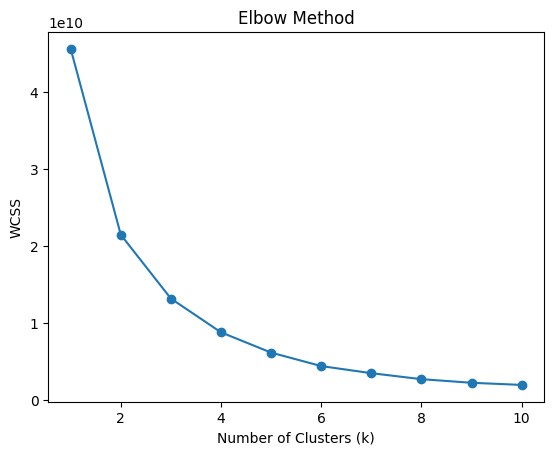

In [34]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

Looking at your plot, the "elbow" seems to be at the point where the rate of decrease sharply changes, which in this case is at k=3. 
This means that increasing the number of clusters from 2 to 3 gives a significant decrease in WCSS, but beyond 3 the decrease is more gradual. 
Thus, k=3 is likely a good choice for the number of clusters based on the Elbow Method applied to your dataset.

### **Silhouette Coefficient**

Average silhouette approach measures the quality of a clustering. That is, it determines how well each object lies within its cluster. A high average silhouette width indicates a good clustering. The optimal number of clusters k is the one that maximize the average silhouette over a range of possible values for k. 

The algorithm can be computed as follow: 
• Compute clustering algorithm (e.g., k-means clustering) for different values of k. 
• For each k, calculate the average silhouette of observations (avg.sil). 
• Plot the curve of avg.sil according to the number of clusters k. 
• The location of the maximum is considered as the appropriate number of clusters.  

The silhouette score falls within the range [-1, 1]. The silhouette score of 1 means that the clusters are very dense and nicely separated. 
The score of 0 means that clusters are overlapping. 
The score of less than 0 means that data belonging to clusters may be wrong/incorrect.

In [35]:
# Instantiate the KMeans for 3 clusters
km = KMeans(n_clusters=3, random_state=42)
# Fit the KMeans model
km.fit_predict(df2)
# Calculate Silhoutte Score
score = silhouette_score(df2, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Coefficient: %.3f' % score)

Silhouetter Coefficient: 0.694


### **Calinski-Harabasz Index**

The Calinski-Harabasz Index (also known as the Variance Ratio Criterion) is a metric used to evaluate the quality of clusters created by a clustering algorithm. A higher Calinski-Harabasz score relates to a model with better-defined clusters.

The Calinski-Harabasz Index is defined as the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared). 

In [36]:
# Fit KMeans and predict clusters
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(df2)

# Calculate Calinski-Harabasz Index
ch_score = calinski_harabasz_score(df2, cluster_labels)
print('Calinski-Harabasz Index: %.3f' % ch_score)

Calinski-Harabasz Index: 15032.797


### **Davies-Bouldin Index**

The Davies-Bouldin Index is a validation metric that is used to evaluate clustering models. It is calculated as the average similarity measure of each cluster with the cluster most similar to it. In this context, similarity is defined as the ratio between inter-cluster and intra-cluster distances. As such, this index ranks well-separated clusters with less dispersion as having a better score.

In practice, the DBI will usually be within a range that is specific to the dataset being analyzed. Lower values of the DBI indicate better clustering quality, with the minimum value of 0 being the best. High values suggest poor clustering, either due to clusters being too close to each other or because of high variance within the clusters.

When using the DBI to evaluate the quality of clusters, one typically looks for the clustering solution that minimizes the DBI. It's common to calculate the DBI for various numbers of clusters and then choose the number of clusters that yields the lowest DBI, provided that the clustering solution is sensible and interpretable for the problem at hand.

In [37]:
# Fit KMeans and predict clusters
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(df2)

# Calculate Davies-Bouldin Index
dbi = davies_bouldin_score(df2, cluster_labels)
print('Davies-Bouldin Index: %.3f' % dbi)

Davies-Bouldin Index: 0.561


### **Dimensionality Reduction Metrics**

Dimensionality reduction aims to reduce the number of features while preserving the original information as much as possible. Because of that, many of the evaluation metrics in dimensionality reduction were all about information preservation. 
 A good rule of thumb is to choose the number of components that gets you to a sufficiently high percentage of the total variance (often around 95% is used in practice). 

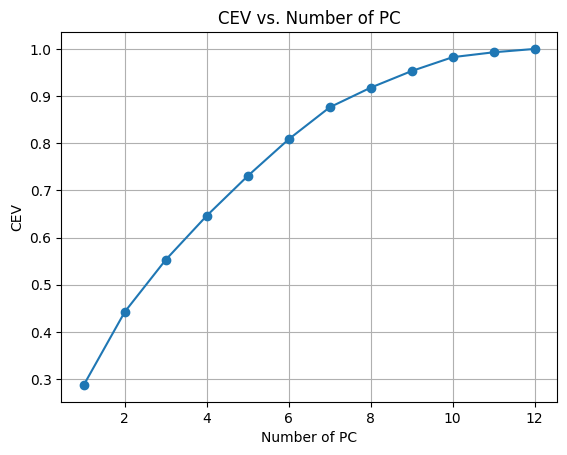

In [38]:
#Scaled the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df2)

pca = PCA()
pca.fit(df_scaled)

#Calculate Cumulative Explained Variance
cev = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(cev) + 1), cev, marker='o')
plt.xlabel('Number of PC')
plt.ylabel('CEV')
plt.title('CEV vs. Number of PC')
plt.grid()

Based on this plot, it looks like a number of components around 7 would capture most of the variability in the data without including all of the components, thus achieving dimensionality reduction while retaining the essential characteristics of the original data.

### **Trustworthiness**

Trustworthiness is a measurement of the dimensionality reduction technique quality. This metric measured how well the reduced dimension preserved the original data nearest neighbor.

Basically, the metric tries to see how well the dimension reduction technique preserved the data in maintaining the original data's local structure.

The Trustworthiness metric ranges between 0 to 1, where values closer to 1 are means the neighbor that is close to reduced dimension data points are mostly close as well in the original dimension.

In [39]:
# Step 1: Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df2)

# Step 2: Apply PCA for dimensionality reduction
# You can decide how many components you want for PCA, let's say 2 for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Step 3: Calculate the trustworthiness of the low-dimensional projection
# 'k' is a parameter and represents the number of neighbors to consider.
# Common practice is to choose a value between 5 and 20.
k = 5
trust_score = trustworthiness(df_scaled, df_pca, n_neighbors=3)
print('Trustworthiness: %.3f' % trust_score)

Trustworthiness: 0.835


### **Sammon’s Mapping**

Sammon’s mapping is a non-linear dimensionality reduction technique to preserve the high-dimensionality pairwise distance when being reduced. 
The objective is to use Sammon’s Stress function to calculate the pairwise distance between the original data and the reduction space.

The lower Sammon’s stress function score, the better because it indicates better pairwise preservation. 
 

In [40]:
df2 = df2.dropna() 
df2 = df2.drop_duplicates()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df2)

# Apply Sammon's mapping
# e is the desired dimensionality of the output data (e.g., e=2 for 2D)
# maxhalves and maxiter are parameters controlling the optimization process
# maxhalves controls the number of step size halvings
# maxiter controls the number of iterations
# threshold is the threshold for convergence
[e, y] = sammon.sammon(df_scaled, maxhalves=10, maxiter=500)

print(f'Final value of the cost function: {e}')
print(f'Coordinates of the points in the low-dimensional space: {y}')

Final value of the cost function: [[-4.64945473  5.89174552]
 [-1.7933001   0.54265484]
 [-2.66369027  2.09849546]
 ...
 [-8.50834337  2.00397736]
 [-0.2745957  -0.4428879 ]
 [-1.5277041  -0.97010384]]
Coordinates of the points in the low-dimensional space: 0.16327167693996636


# Exclusive clustering

### K-means clustering
A data point can exist in only one cluster.

Data points are assigned into K groups, where K represents the number of clusters based on the distance from each group’s centroid. The data points closest to a given centroid will be clustered under the same category.
When K is bigger, the groups are smaller.
When K is smaller, the groups are bigger.

K-means clustering steps:

1. Choose the number of clusters (K): First, decide how many clusters you want to identify in your data. This is represented by the variable K.
2. Initialize cluster centroids: Randomly select K data points from the dataset to serve as the initial centroids of the clusters.
3. Assign data points to nearest cluster: Calculate the distance between each data point and the centroids of the clusters. Assign each data point to the cluster with the nearest centroid.
4. Update cluster centroids: Recalculate the centroids of the clusters based on the mean of the data points that belong to each cluster.
5. Reassign data points to nearest cluster: Repeat the process of assigning each data point to the cluster with the closest centroid.
6. Repeat steps 4 and 5 until convergence: Keep updating the centroids and reassigning the data points until the centroids no longer change significantly, or until a maximum number of iterations is reached.
7. Finalize clusters: Once the algorithm converges, the data points will be divided into K clusters based on the final centroids.

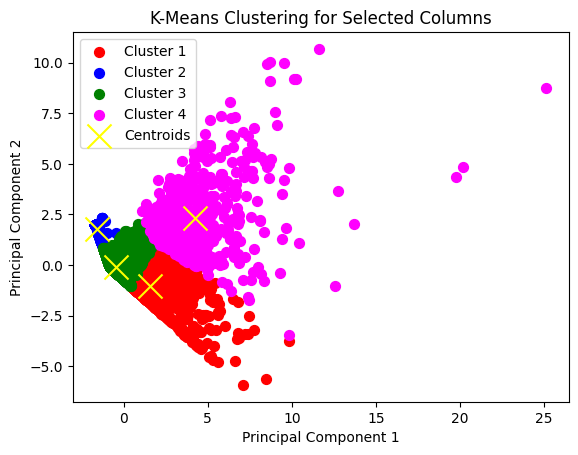

In [41]:
# Load the data
df2 = pd.read_csv('data/online_shoppers_intention.csv', encoding="utf-8")
selected_columns = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration','BounceRates']

df_selected = df2[selected_columns]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_selected)

kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
kmeans.fit(scaled_data)
labels = kmeans.labels_

df2['cluster'] = labels

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_data)

# Visualizing the clusters
plt.scatter(principalComponents[labels == 0, 0], principalComponents[labels == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(principalComponents[labels == 1, 0], principalComponents[labels == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(principalComponents[labels == 2, 0], principalComponents[labels == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(principalComponents[labels == 3, 0], principalComponents[labels == 3, 1], s=50, c='magenta', label='Cluster 4')

# Plot the centroids of the clusters
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', label='Centroids', marker='x')
plt.title('K-Means Clustering for Selected Columns')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


Overlapping clustering
## Fuzzy k-means clustering

Data points can belong to multiple clusters with varying degrees of membership (example: Fuzzy k-means).

Instead of assigning each point completely to a cluster, the algorithm assigns membership coefficients to the point for different clusters. These coefficients represent the degree to which the data point belongs to each cluster.

Fuzzy k-means clustering steps:

1. Choose the number of clusters (K): Decide the number of clusters you want to identify in your data, represented by the variable K.
2. Assign initial membership values: Initialize the degree of membership for each data point to each cluster randomly. These membership values indicate the degree to which a data point belongs to each cluster.
3. Compute cluster centers: Calculate the centroids of the clusters based on the current membership values. These centroids are computed using a weighted average of the data points, where the weights are the membership values.
4. Update membership values: Recompute the degree of membership for each data point to each cluster based on the current centroids. This is done using a formula that considers the distance between the data point and each cluster centroid.
5. Repeat steps 3 and 4 until convergence: Iterate the process of updating the cluster centroids and membership values until the membership values converge or a maximum number of iterations is reached.
6. Finalize clusters: Once the algorithm converges, the data points will have membership values for each cluster, indicating the degree of belongingness to each cluster. Based on these membership values, each data point can be assigned to one or more clusters, allowing for overlapping or fuzzy clusters.

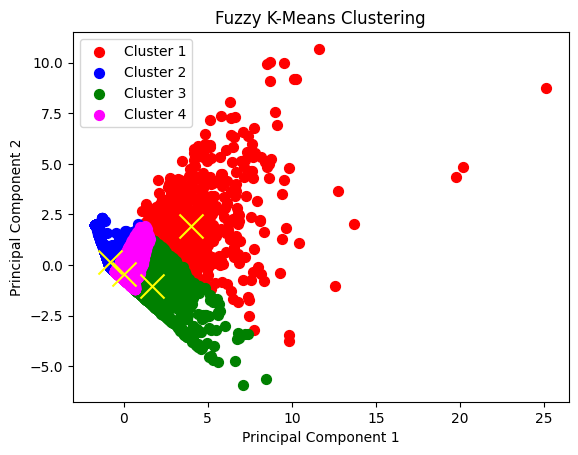

In [42]:
df = pd.read_csv('data/online_shoppers_intention.csv', encoding="utf-8")
selected_columns = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration','BounceRates']
df_selected = df[selected_columns]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_selected)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_data)

# Fuzzy K-Means clustering
centroids, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    principalComponents.T, c=4, m=2, error=0.005, maxiter=1000, init=None
)
labels = np.argmax(u, axis=0)

df['cluster'] = labels

# Plotting the clusters
plt.scatter(principalComponents[labels == 0, 0], principalComponents[labels == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(principalComponents[labels == 1, 0], principalComponents[labels == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(principalComponents[labels == 2, 0], principalComponents[labels == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(principalComponents[labels == 3, 0], principalComponents[labels == 3, 1], s=50, c='magenta', label='Cluster 4')
 
plt.scatter(centroids[0, 0], centroids[0, 1], s=300, c='yellow', marker='x')
plt.scatter(centroids[1, 0], centroids[1, 1], s=300, c='yellow', marker='x')
plt.scatter(centroids[2, 0], centroids[2, 1], s=300, c='yellow', marker='x')
plt.scatter(centroids[3, 0], centroids[3, 1], s=300, c='yellow', marker='x')

plt.title('Fuzzy K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Hierarchical clustering

Hierarchical clustering is beneficial for understanding the relationships and structures within complex datasets, as it provides an intuitive visualization of the data's inherent grouping patterns. Hierarchical clustering can be categorized into two main types: agglomerative and divisive. These two approaches represent different strategies for building the hierarchy of clusters.

### Divisive Clustering
Divisive Clustering, often known as the top-down approach, is the inverse of agglomerative clustering. It starts with a single cluster containing all data points and then progressively divides the cluster based on the dissimilarities among data points. This approach helps in uncovering the hierarchical structure within the dataset by iteratively splitting clusters into smaller subclusters.

The primary objective of divisive clustering is to create clusters that are distinct from one another, ensuring that each division maximizes the dissimilarity between the resulting subclusters. By repeatedly splitting the clusters, this method enables the exploration of finer details and relationships present within the data.

Divisive clustering is useful when dealing with large and complex datasets, as it allows for a comprehensive analysis of the data's underlying structure. However, this approach may require careful consideration of the criteria for splitting clusters to ensure the formation of meaningful and distinct subclusters.

### Agglomerative Clustering

Agglomerative Clustering, also known as the bottom-up approach, where data points begin as separate individual groupings and are progressively merged based on their similarities, ultimately leading to the formation of a single cluster. This approach helps reveal the inherent structure and relationships present within the dataset.
There are various methods used within agglomerative clustering to determine the merging of clusters:
- Ward’s Linkage: This method defines the distance between two clusters by considering the increase in the sum of squares after merging the clusters. It aims to minimize the variance within each cluster.
- Average Linkage: The average linkage method calculates the mean distance between all pairs of points in different clusters and merges clusters with the smallest average distance.
- Complete (or Maximum) Linkage: This method defines the distance between two clusters based on the maximum distance between any two points in the clusters.
- Single (or Minimum) Linkage: In this method, the distance between two clusters is determined by the minimum distance between any two points in the clusters.
- Centroid Linkage: This approach involves finding the centroids of each cluster and then calculating the distance between these centroids.

Agglomerative clustering commonly employs the Euclidean distance metric to measure the distances between data points and clusters, providing a reliable means of evaluating the similarities or dissimilarities between various data points. This method is particularly useful in revealing the hierarchical relationships and structures within complex datasets.

The example of Agglomerative Clustering is described below:

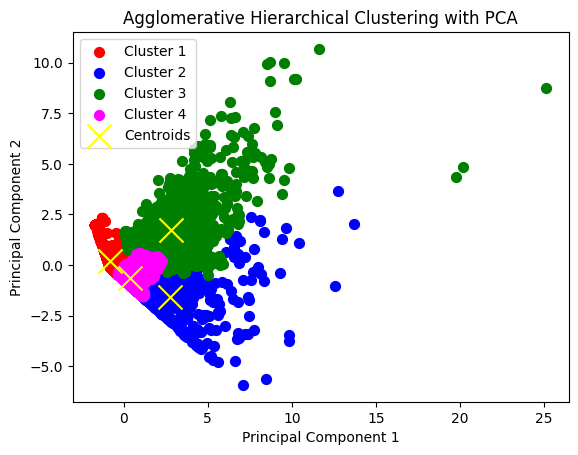

In [43]:
df = pd.read_csv('data/online_shoppers_intention.csv', encoding="utf-8")

selected_columns = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration','BounceRates']
df_selected = df[selected_columns]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_selected)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_data)

# Agglomerative Hierarchical Clustering
clustering = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
labels = clustering.fit_predict(principalComponents)

# Adding the labels to the dataframe
df['cluster'] = labels

# Plot the clusters 
plt.scatter(principalComponents[labels == 0, 0], principalComponents[labels == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(principalComponents[labels == 1, 0], principalComponents[labels == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(principalComponents[labels == 2, 0], principalComponents[labels == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(principalComponents[labels == 3, 0], principalComponents[labels == 3, 1], s=50, c='magenta', label='Cluster 4')

centroids = []
for label in np.unique(labels):
    centroids.append(np.mean(principalComponents[labels == label], axis=0))


centroids = np.array(centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', label='Centroids', marker='x') 
plt.title('Agglomerative Hierarchical Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Probabilistic Clustering

Probabilistic Clustering is a technique designed to address density estimation or "soft" clustering problems, wherein data points are clustered based on the probability or likelihood that they belong to a particular distribution.

One of the prominent methods within probabilistic clustering is the use of Gaussian Mixture Models (GMMs). GMMs are classified as mixture models, comprising an unspecified number of probability distribution functions, often Gaussian or normal distributions. These models are instrumental in determining the probability that a given data point belongs to a specific Gaussian probability distribution.

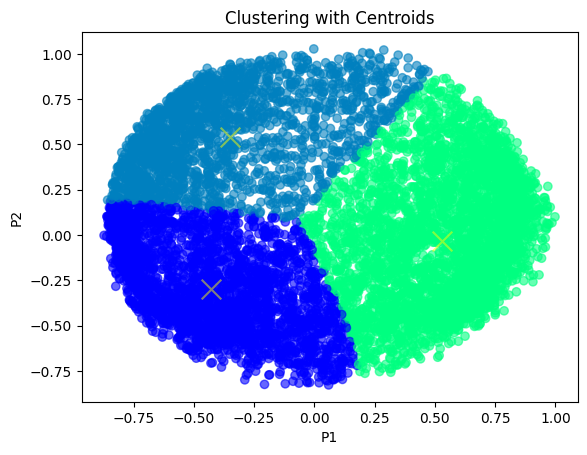

In [44]:
# Load and preprocess the dataset
raw_df = pd.read_csv('data/CC GENERAL.csv', encoding="utf-8")
raw_df = raw_df.drop('CUST_ID', axis = 1) 
raw_df.ffill(inplace=True) 

# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(raw_df) 

# Normalizing the Data 
normalized_df = normalize(scaled_df) 

# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

# Perform Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components = 3) 
gmm.fit(X_principal)

# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'], c = gmm.predict(X_principal), cmap =plt.cm.winter, alpha = 0.6) 

# Visualizing the centroids
centroids = gmm.means_
plt.scatter(centroids[:, 0], centroids[:, 1], c='yellow', s=200, alpha=0.5, marker='x')

plt.title('Clustering with Centroids')
plt.xlabel('P1')
plt.ylabel('P2')
plt.show()